<a href="https://colab.research.google.com/github/Emersonmiady/bootcamp-alura-ds/blob/main/modulo_2/tratamento_exploracao_e_visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from io import StringIO
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Módulo 1

## 01. Aquisição e leitura de dados reais

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Alura Bootcamp DS/Módulo 1/datasets/A155929189_28_143_208.csv', 
                 sep=';', skiprows=3, skipfooter=12, encoding='ISO-8859-1',
                 thousands='.', decimal=',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

Unidade da Federação     2008/Jan  ...     2020/Ago         Total
0          11 Rondônia   1388528.39  ...  10285455.78  9.291297e+08
1              12 Acre    902416.00  ...            -  4.206680e+08
2          13 Amazonas   4735529.42  ...  14726443.67  1.771655e+09
3           14 Roraima    657889.53  ...   2826486.18  3.050109e+08
4              15 Pará  18864744.11  ...  39911193.02  4.437116e+09

[5 rows x 154 columns]

In [ ]:
df.tail()

Unidade da Federação     2008/Jan  ...      2020/Ago         Total
22   43 Rio Grande do Sul  30931325.46  ...  101374341.51  1.195865e+10
23  50 Mato Grosso do Sul   5377392.11  ...   19241624.02  2.172158e+09
24         51 Mato Grosso   4795299.01  ...   17790649.87  2.036924e+09
25               52 Goiás  15310637.29  ...   43984702.05  4.657350e+09
26    53 Distrito Federal   4745919.19  ...   26526196.39  2.429933e+09

[5 rows x 154 columns]

In [ ]:
# Formatando as próximas medidas em ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [ ]:
df.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64


### Desafio 1: escolher um título mais descritivo, que passe a mensagem adequada.

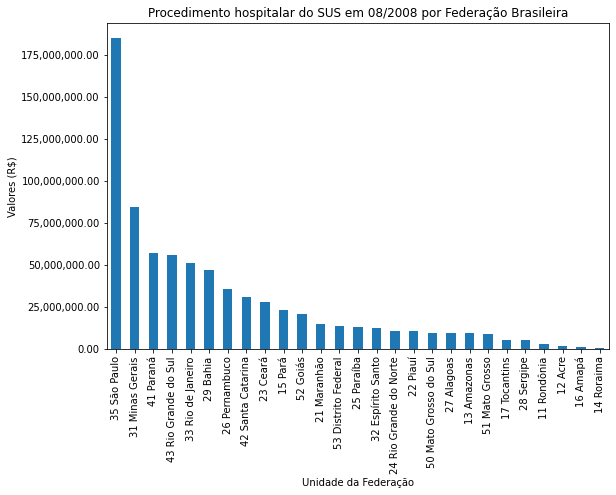

In [ ]:
ax = df.sort_values('2008/Ago', ascending=False)
ax = ax.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.get_legend().remove()
plt.ylabel('Valores (R$)')
plt.title('Procedimento hospitalar do SUS em 08/2008 por Federação Brasileira')
plt.show()

### Desafio 2: faça a mesma análise pro mês mais recente.

In [ ]:
df['2020/Ago'].unique()

array(['10285455.78', '-', '14726443.67', '2826486.18', '39911193.02',
       '2942273.94', '8240261.38', '28587541.78', '23210624.20',
       '59808605.59', '24929930.72', '22130016.81', '75704177.72',
       '19754741.78', '11014180.89', '80793117.08', '168024412.95',
       '32188873.88', '95274486.35', '346512263.17', '129375911.54',
       '63972379.36', '101374341.51', '19241624.02', '17790649.87',
       '43984702.05', '26526196.39'], dtype=object)

In [ ]:
df['2020/Ago'] = df['2020/Ago'].replace('-', None)
df['2020/Ago'] = pd.to_numeric(df['2020/Ago'])
df['2020/Ago'].unique()

array([1.02854558e+07, 1.47264437e+07, 2.82648618e+06, 3.99111930e+07,
       2.94227394e+06, 8.24026138e+06, 2.85875418e+07, 2.32106242e+07,
       5.98086056e+07, 2.49299307e+07, 2.21300168e+07, 7.57041777e+07,
       1.97547418e+07, 1.10141809e+07, 8.07931171e+07, 1.68024413e+08,
       3.21888739e+07, 9.52744863e+07, 3.46512263e+08, 1.29375912e+08,
       6.39723794e+07, 1.01374342e+08, 1.92416240e+07, 1.77906499e+07,
       4.39847020e+07, 2.65261964e+07])

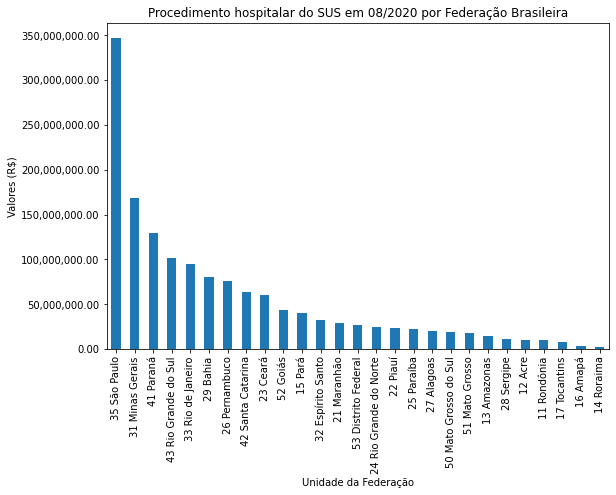

In [ ]:
ax2 = df.sort_values('2020/Ago', ascending=False)
ax2 = ax2.plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(9,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax2.get_legend().remove()
plt.ylabel('Valores (R$)')
plt.title('Procedimento hospitalar do SUS em 08/2020 por Federação Brasileira')
plt.show()

## 02. Primeiras visualizações de dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Alura Bootcamp DS/Módulo 1/datasets/A190934189_28_143_208.csv', 
                 sep=';', skiprows=3, skipfooter=12, encoding='ISO-8859-1',
                 thousands='.', decimal=',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

Unidade da Federação 1992/Mar 1992/Abr  ...    2020/Jul     2020/Ago         Total
0          11 Rondônia        -        -  ...  7407388.24   3556381.57  929129659.72
1              12 Acre        -        -  ...  1163813.08            -  420668039.63
2          13 Amazonas        -        -  ... 13358514.02   4726485.73 1771654871.23
3           14 Roraima        -        -  ...  2739498.41   1524478.04  305010883.18
4              15 Pará        -        -  ... 27618727.51  11559714.54 4437115730.71

[5 rows x 280 columns]

In [ ]:
# Estratégia para pegar somente as colunas com valores numéricos
usable_columns = df.mean().index.tolist()

In [ ]:
usable_columns.insert(0, 'Unidade da Federação')
print(usable_columns)

['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun', '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov', '2009/Dez', '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez', '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '20

In [ ]:
usable_df = df[usable_columns]
usable_df.head()

Unidade da Federação  2007/Ago  ...    2020/Jul         Total
0          11 Rondônia   4209.37  ...  7407388.24  929129659.72
1              12 Acre  10470.07  ...  1163813.08  420668039.63
2          13 Amazonas  35752.72  ... 13358514.02 1771654871.23
3           14 Roraima   4785.91  ...  2739498.41  305010883.18
4              15 Pará 181159.29  ... 27618727.51 4437115730.71

[5 rows x 158 columns]

In [ ]:
usable_df = usable_df.set_index('Unidade da Federação')
usable_df.head()

2007/Ago  2007/Set  ...    2020/Jul         Total
Unidade da Federação                      ...                          
11 Rondônia            4209.37  16397.03  ...  7407388.24  929129659.72
12 Acre               10470.07  14001.71  ...  1163813.08  420668039.63
13 Amazonas           35752.72  45570.64  ... 13358514.02 1771654871.23
14 Roraima             4785.91  11858.63  ...  2739498.41  305010883.18
15 Pará              181159.29 433414.74  ... 27618727.51 4437115730.71

[5 rows x 157 columns]

In [ ]:
usable_df.loc['12 Acre']

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

In [ ]:
# Primeiro irei sortear os valores pelos que mais gastaram historicamente
usable_df = usable_df.sort_values('Total', ascending=False)
# Depois dropar a coluna 'Total'
usable_df = usable_df.drop('Total', axis=1)
usable_df.head()

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

### Desafio 1: reposicionar a legenda em uma posição mais adequada.

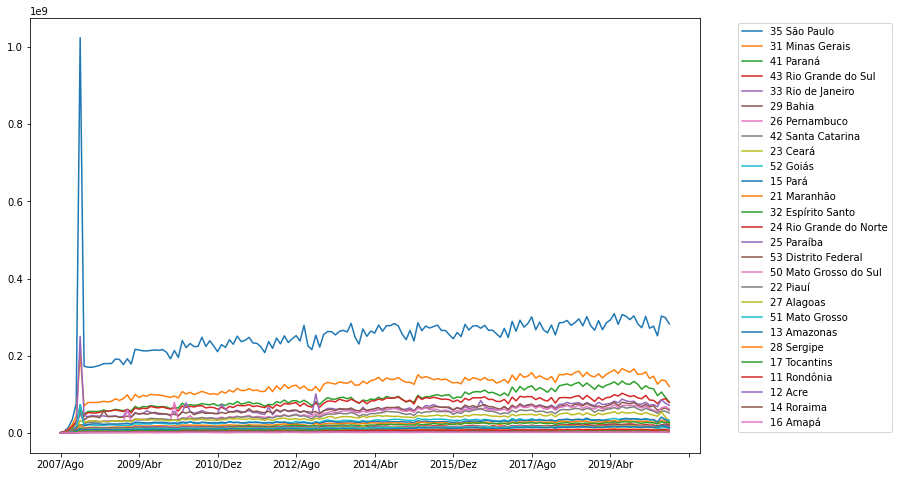

In [ ]:
usable_df.T.plot(figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Desafio 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência.

Os 5 estados escolhidos são aqueles em que o total gasto são os maiores, historicamente falando.

In [ ]:
usable_df[:5]

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

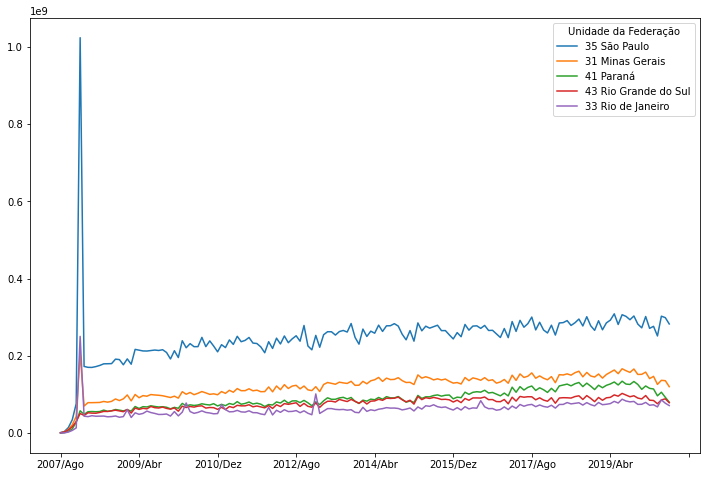

In [ ]:
usable_df[:5].T.plot(figsize=(12, 8))
plt.show()

## 03. Manipulação de dados

### Desafio 1: Mudar a palete de cores com o Matplotlib (último gráfico da seção 02).

In [ ]:
# Escolhendo aleatoriamente as cores da palete 'nipy_spectral'
cmap = plt.get_cmap('nipy_spectral')
colors = [cmap(i) for i in np.linspace(0, 1, len(usable_df))]

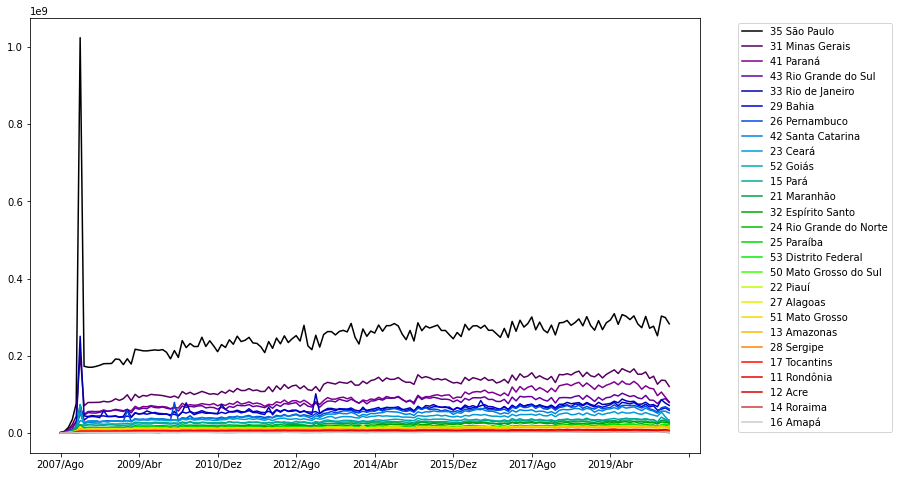

In [ ]:
usable_df.T.plot(figsize=(12, 8), color=colors)
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
# Algoritmo de aleatoriedade: "Pseudo Randomless"
np.random.seed(687942)
usable_df.sample(7)

2007/Ago   2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                        ...                        
22 Piauí              220788.25  353468.67  ... 15375523.59 18019214.49
50 Mato Grosso do Sul 199556.12  573675.41  ... 15838659.34 12508717.35
15 Pará               181159.29  433414.74  ... 35396030.78 27618727.51
26 Pernambuco         400640.85 1088340.42  ... 68145110.59 62325444.34
16 Amapá               33672.74  104822.98  ...  2699492.23  2155083.37
11 Rondônia             4209.37   16397.03  ...  9193593.76  7407388.24
29 Bahia              135146.36  448349.75  ... 65159300.63 58898100.40

[7 rows x 156 columns]

### Desafio 2: adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Sudeste e Centro-Oeste) de cada estado.

In [ ]:
usable_df['Região'] = None
print(usable_df.index)

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')


In [ ]:
# Iterando a partir do primeiro caracter de cada index
for index in usable_df.index:
  if index[0] == '1':
    usable_df.loc[index, 'Região'] = 'Norte'
  elif index[0] == '2':
    usable_df.loc[index, 'Região'] = 'Nordeste'
  elif index[0] == '3':
    usable_df.loc[index, 'Região'] = 'Sudeste'
  elif index[0] == '4':
    usable_df.loc[index, 'Região'] = 'Sul'
  else:
    usable_df.loc[index, 'Região'] = 'Centro-Oeste'
usable_df.head()

2007/Ago   2007/Set  ...     2020/Jul   Região
Unidade da Federação                        ...                      
35 São Paulo         1665349.90 4434168.64  ... 282709570.31  Sudeste
31 Minas Gerais       971394.37 2861781.50  ... 120467187.34  Sudeste
41 Paraná             554800.22 1431708.01  ...  80320852.69      Sul
43 Rio Grande do Sul 1049252.33 3182913.14  ...  78929703.81      Sul
33 Rio de Janeiro     469469.34  921646.57  ...  71540227.33  Sudeste

[5 rows x 157 columns]

### Desafio 3: deixar o gráfico mais bonito, com a mensagem mais clara.
### Desafio 4: adicione outro Estado aos 5 Estados existentes e plote.


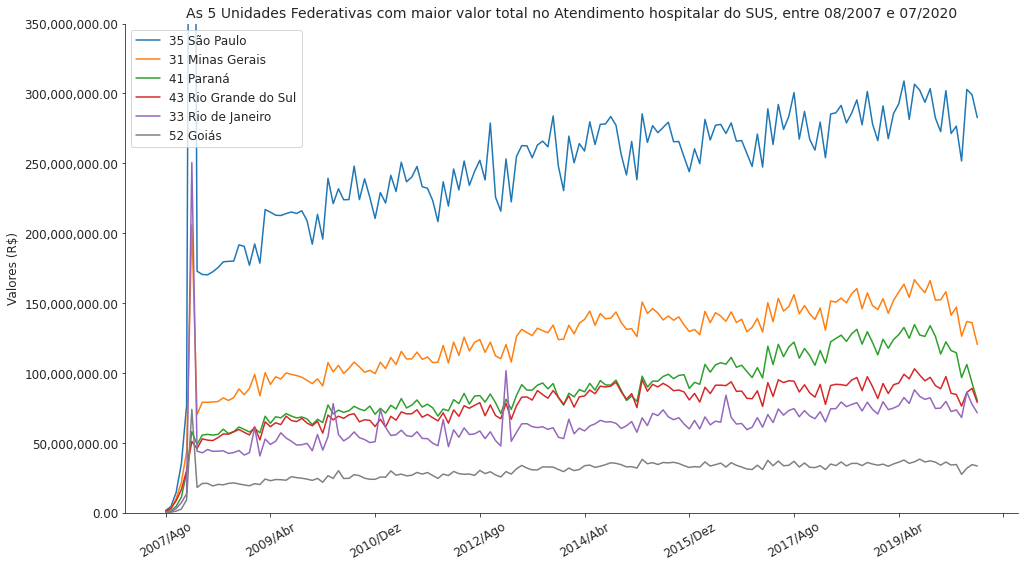

In [ ]:
sns.set_style('ticks')
ax = usable_df.drop('Região', axis=1)[:5].T.plot(figsize=(16, 9))
# Acrescentando mais uma UF
usable_df.drop('Região', axis=1).loc['52 Goiás',].T.plot(color='gray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylim(0, 350000000)
plt.ylabel('Valores (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('As 5 Unidades Federativas com maior valor total no Atendimento hospitalar do SUS, entre 08/2007 e 07/2020',
          fontsize=14)
sns.despine(trim=False)
plt.show()

In [ ]:
# Dropando da coluna '2008/Jan' para trás, pois podem ser dados incertos
usable_df = usable_df.drop(usable_df.columns[:6], axis=1)

In [ ]:
usable_df.head()

2008/Fev     2008/Mar  ...     2020/Jul   Região
Unidade da Federação                            ...                      
35 São Paulo         172834914.73 170481849.56  ... 282709570.31  Sudeste
31 Minas Gerais       70301089.50  79119005.51  ... 120467187.34  Sudeste
41 Paraná             48855046.46  55611791.07  ...  80320852.69      Sul
43 Rio Grande do Sul  45897704.82  52928695.92  ...  78929703.81      Sul
33 Rio de Janeiro     44122593.19  42892665.52  ...  71540227.33  Sudeste

[5 rows x 151 columns]

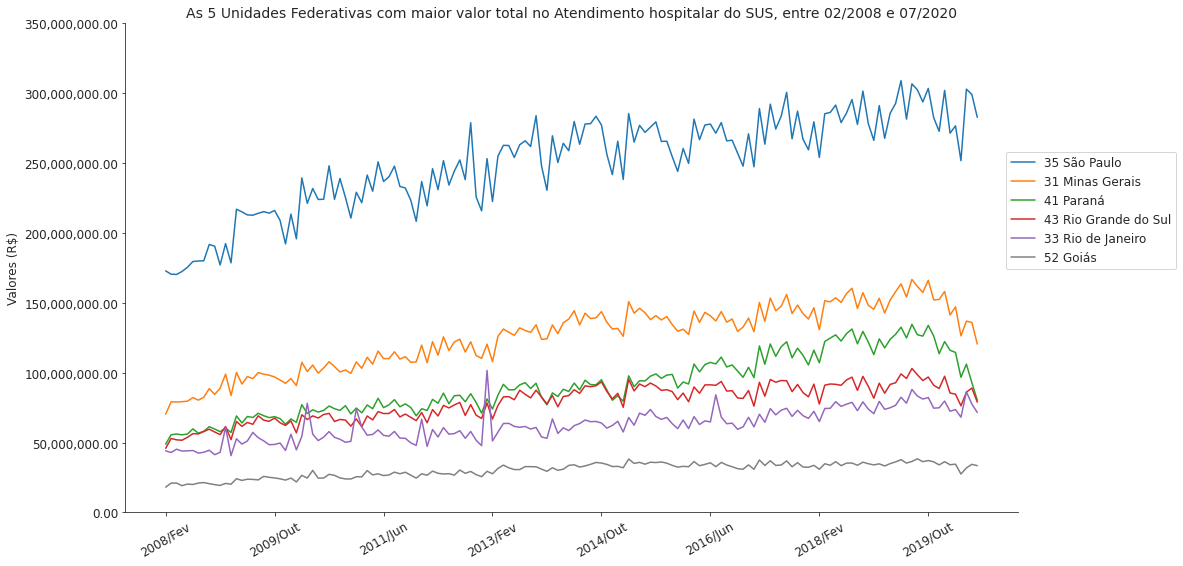

In [ ]:
ax = usable_df.drop('Região', axis=1)[:5].T.plot(figsize=(16, 9))
# Acrescentando mais uma UF
usable_df.drop('Região', axis=1).loc['52 Goiás',].T.plot(color='gray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylim(0, 350000000)
plt.ylabel('Valores (R$)', fontsize=12)
plt.legend(bbox_to_anchor=(0.98, 0.75), fontsize=12)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('As 5 Unidades Federativas com maior valor total no Atendimento hospitalar do SUS, entre 02/2008 e 07/2020',
          fontsize=14)
sns.despine(trim=False)
plt.show()

### Desafio 5: buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.


Para concluir este desafio, utilizei uma base de dados do próprio site do governo brasileiro, encontrado nesse [link](https://antigo.saude.gov.br/saude-de-a-z/dengue/situacao-epidemiologica-dados) (clique em "Casos Prováveis de Dengue. Brasil, Grandes Regiões e Unidades Federadas. 1998 a 2018").

**Observações:** 
- Essa base de dados são os casos PROVÁVEIS de dengue no Brasil, portanto não é a realidade e sim uma estipulação;
- Não consegui achar alguma base de dados que fornecia mensalmente os casos, portanto parte da pergunta ficarei devendo :P.

In [ ]:
dengue_df = pd.read_excel('/content/drive/MyDrive/Alura Bootcamp DS/Módulo 1/datasets/Serie-Historica-1998-a-2018-PROVAVEIS-DENGUE-SITE.xlsx',
                        skiprows=1, skipfooter=4, thousands='.')
dengue_df.head()

Região e UF   1998  1999   2000   2001  ...   2014   2015   2016   2017  2018*
0  Região Norte  27018  7128  24686  51328  ...  48376  31411  39011  21638  17857
1      Rondônia     23   699   3193   1668  ...   1985   2211   7769   2112    536
2          Acre      0     0   1295   2050  ...  28269   5317   2335   1820   6919
3      Amazonas  13894   186   6343  19249  ...   6661   3792   8125   3889   2456
4       Roraima    258  1999   4108   3782  ...   1123   1097    246    283    127

[5 rows x 22 columns]

**Observação:** 2018 não teve uma estipulação completa, pois provavelmente, o ano não havia acabado.

In [ ]:
dengue_df = dengue_df.drop(dengue_df.columns[1:10], axis=1)
dengue_df.head()

Região e UF   2007   2008   2009   2010  ...   2014   2015   2016   2017  2018*
0  Região Norte  36552  48946  55611  98632  ...  48376  31411  39011  21638  17857
1      Rondônia   3118   5765  18767  20294  ...   1985   2211   7769   2112    536
2          Acre    518   2129  19085  35162  ...  28269   5317   2335   1820   6919
3      Amazonas   1938   8755   1591   7524  ...   6661   3792   8125   3889   2456
4       Roraima    876   5016   3073   7590  ...   1123   1097    246    283    127

[5 rows x 13 columns]

In [ ]:
brasil_history = dengue_df[dengue_df['Região e UF'] == 'Brasil']
brasil_history = brasil_history.set_index('Região e UF')
display(brasil_history)

2007    2008    2009     2010  ...     2015     2016    2017   2018*
Região e UF                                   ...                                  
Brasil       496923  632680  406269  1011548  ...  1688688  1500535  239389  264246

[1 rows x 12 columns]

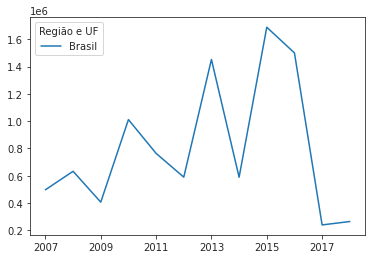

In [ ]:
brasil_history.T.plot()

Okay, acho que os dados a partir de 2017 estão desatualizados, justificando assim a queda brusca dos casos brasileiros de dengue. Então farei um slice e darei uma ajeitada no gráfico.

Obviamente que pode ter acontecido de fato essa queda, mas não acho tão provável...

In [ ]:
brasil_history = brasil_history[brasil_history.columns[:10]]
brasil_history.head()

2007    2008    2009     2010  ...     2013    2014     2015     2016
Região e UF                                   ...                                   
Brasil       496923  632680  406269  1011548  ...  1452489  589107  1688688  1500535

[1 rows x 10 columns]

[]

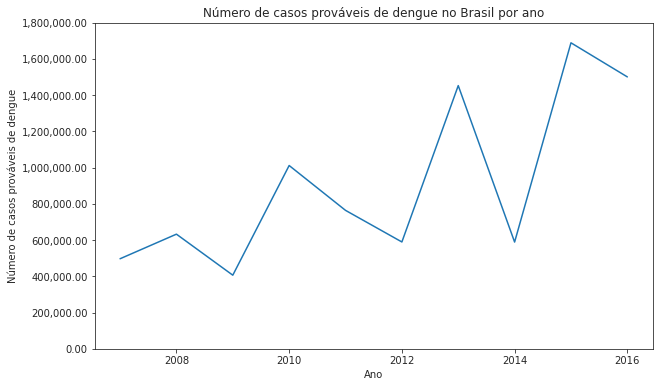

In [ ]:
ax = brasil_history.T.plot(figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.get_legend().remove()
plt.ylabel('Número de casos prováveis de dengue')
plt.xlabel('Ano')
plt.title('Número de casos prováveis de dengue no Brasil por ano')
plt.ylim(0,1800000)
plt.plot()

- Os casos prováveis de dengue estão, de uma forma geral, em uma crescente desde 2007. O gráfico de linhas aparenta ser bem inconsistente, ou seja, existem várias subidas e descidas (picos).

- Intercaladamente, o número sobe e desce anualmente, tirando o caso de 2011.

- Em relação a 2013, houve um pico no número de casos prováveis, podendo ter alguma relação sim com aquele gráfico do desafio 3.

Vamos verificar agora os números por regiões.

In [ ]:
regions = []
for region in dengue_df['Região e UF']:
  if region.startswith('Região'):
    regions.append(region)
print(regions)

['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']


In [ ]:
dengue_regions_uf = dengue_df.set_index('Região e UF')
dengue_regions_uf.head()

2007   2008   2009   2010  ...   2015   2016   2017  2018*
Região e UF                               ...                            
Região Norte  36552  48946  55611  98632  ...  31411  39011  21638  17857
Rondônia       3118   5765  18767  20294  ...   2211   7769   2112    536
Acre            518   2129  19085  35162  ...   5317   2335   1820   6919
Amazonas       1938   8755   1591   7524  ...   3792   8125   3889   2456
Roraima         876   5016   3073   7590  ...   1097    246    283    127

[5 rows x 12 columns]

In [ ]:
dengue_regions = dengue_regions_uf.loc[regions]
dengue_regions = dengue_regions[dengue_regions.columns[:10]]
dengue_regions.head()

2007    2008    2009  ...    2014     2015    2016
Região e UF                                  ...                         
Região Norte          36552   48946   55611  ...   48376    31411   39011
Região Nordeste      124869  207808  125296  ...   89935   327212  324815
Região Sudeste       206151  325403  113259  ...  311639  1047279  858273
Região Sul            27772    2166    1641  ...   22988    51681   72650
Região Centro-Oeste  101579   48357  110462  ...  116169   231105  205786

[5 rows x 10 columns]

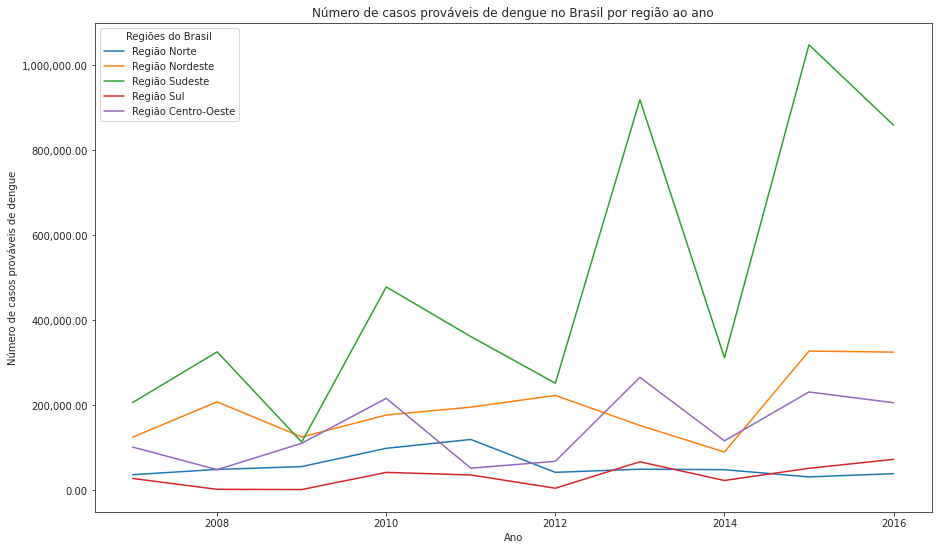

In [ ]:
ax = dengue_regions.T.plot(figsize=(15, 9))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(title='Regiões do Brasil')
plt.ylabel('Número de casos prováveis de dengue')
plt.xlabel('Ano')
plt.title('Número de casos prováveis de dengue no Brasil por região ao ano')
plt.show()

- A região Sudeste foi, em quase todos os anos (tirando 2009), a que teve mais casos prováveis. Ela foi a única que passou dos 400.000 casos prováveis;
- Pelo gráfico, tende-se a pensar que houveram surtos de dengue em 2013 e 2015 na Região Sudeste;
- A Região que teve os menores números de casos prováveis foi o da Região Sul, em quase todos os anos, mantendo uma certa constância em um determinado intervalo;

Vamos observar o que está acontecendo nas 5 UF's que tiveram o maior número de casos prováveis.

In [ ]:
dengue_uf = dengue_regions_uf.drop(index=regions)
dengue_uf = dengue_uf[dengue_uf.columns[:10]]
dengue_uf.head()

2007   2008   2009   2010  ...   2013   2014  2015   2016
Região e UF                              ...                           
Rondônia      3118   5765  18767  20294  ...   8732   1985  2211   7769
Acre           518   2129  19085  35162  ...   2568  28269  5317   2335
Amazonas      1938   8755   1591   7524  ...  17832   6661  3792   8125
Roraima        876   5016   3073   7590  ...    945   1123  1097    246
Pará         13920  15982   7498  15568  ...   9166   4496  7803  10852

[5 rows x 10 columns]

In [ ]:
dengue_uf['Total'] = dengue_uf.sum(axis=1)
dengue_uf = dengue_uf.sort_values('Total', ascending=False)
dengue_uf.head()

2007    2008    2009  ...     2015     2016    Total
Região e UF                             ...                           
Brasil          496923  632680  406269  ...  1688688  1500535  9131862
São Paulo       114872   12605   12003  ...   745622   202896  1887367
Minas Gerais     28287   52088   55146  ...   192779   528441  1615521
Rio de Janeiro   56202  235353    7964  ...    73437    85200  1055711
Goiás            14820   39075   43411  ...   167427   123195   781762

[5 rows x 11 columns]

In [ ]:
dengue_uf = dengue_uf.drop('Total', axis=1)

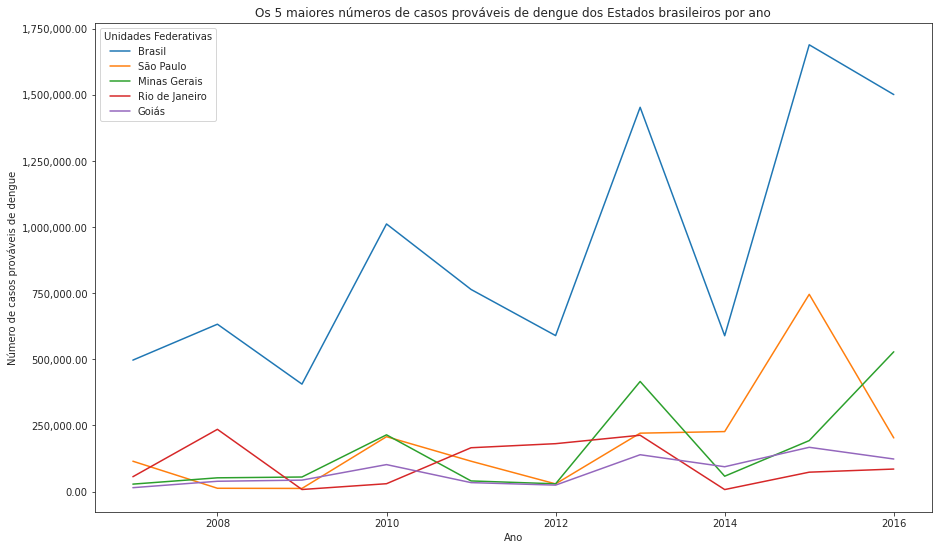

In [ ]:
ax = dengue_uf.head().T.plot(figsize=(15,9))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(title='Unidades Federativas')
plt.ylabel('Número de casos prováveis de dengue')
plt.xlabel('Ano')
plt.title('Os 5 maiores números de casos prováveis de dengue dos Estados brasileiros por ano')
plt.show()

Pelo gráfico, houveram vários picos em todos os Estados, oscilando bastante os valores, como no gráfico das regiões brasileiras. 

Contudo, houveram alguns anos que podem indicar a presença de surtos em algumas regiões, tais como 2008 (Rio de Janeiro), 2010, 2013, 2015 (São Paulo).

### Desafio 6: plotar o gráfico dos custos apenas dos estados da região Sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região.

In [ ]:
southeast_states = usable_df.query('Região == "Sudeste"')
southeast_states.head()

2008/Fev     2008/Mar  ...     2020/Jul   Região
Unidade da Federação                            ...                      
35 São Paulo         172834914.73 170481849.56  ... 282709570.31  Sudeste
31 Minas Gerais       70301089.50  79119005.51  ... 120467187.34  Sudeste
33 Rio de Janeiro     44122593.19  42892665.52  ...  71540227.33  Sudeste
32 Espírito Santo     10032886.43  12262049.08  ...  27460475.47  Sudeste

[4 rows x 151 columns]

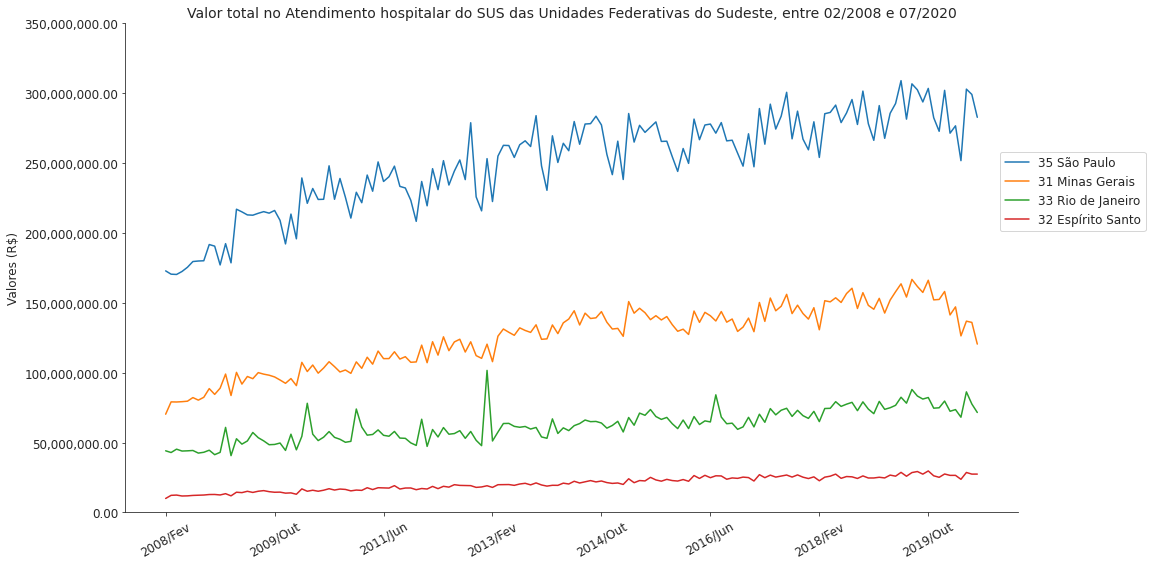

In [ ]:
ax = southeast_states.drop('Região', axis=1)[:5].T.plot(figsize=(16, 9))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylim(0, 350000000)
plt.ylabel('Valores (R$)', fontsize=12)
plt.legend(bbox_to_anchor=(1.15, 0.75), fontsize=12)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Valor total no Atendimento hospitalar do SUS das Unidades Federativas do Sudeste, entre 02/2008 e 07/2020',
          fontsize=14)
sns.despine(trim=False)
plt.show()

Em todos os Estados do Sudeste, houve um pico anterior a "2013/Fev", mostrando uma certa consistência nesse quesito. Entretanto, a diferença nos saltos foram bem distintas, tendo um valor muito diferente da normalidade no Rio de Janeiro, podendo ser uma falha na marcação do valor em sua data real, erros na digitação ou um surto que realmente ocorreu em Fevereiro de 2013 no Rio.

### Desafio 7: adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

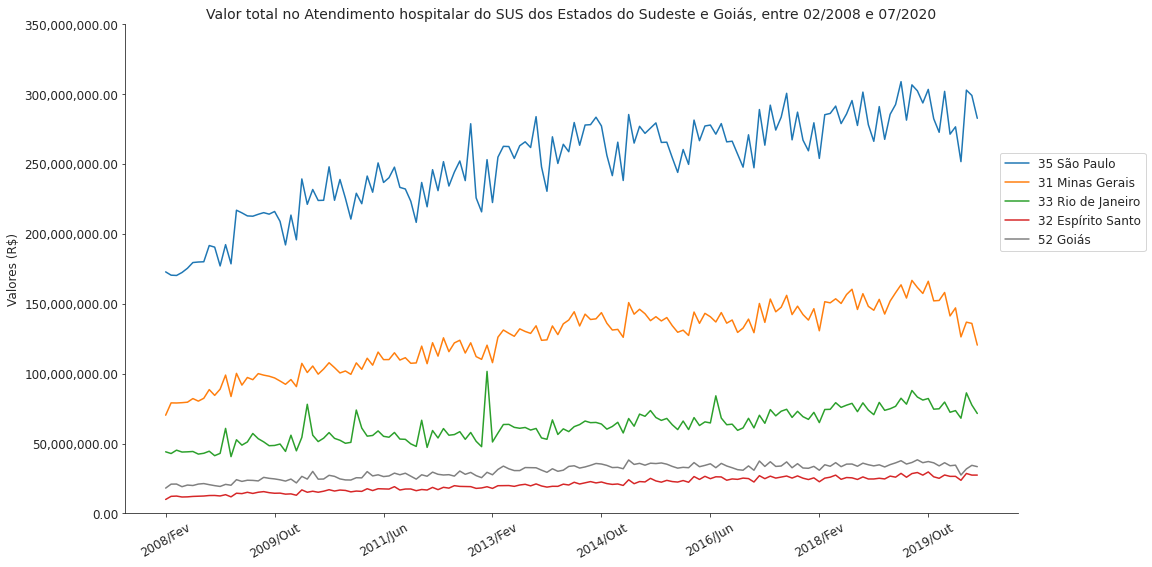

In [ ]:
ax = southeast_states.drop('Região', axis=1)[:5].T.plot(figsize=(16, 9))
# Acrescentando a UF escolhida
usable_df.drop('Região', axis=1).loc['52 Goiás',].T.plot(color='gray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylim(0, 350000000)
plt.ylabel('Valores (R$)', fontsize=12)
plt.legend(bbox_to_anchor=(1.15, 0.75), fontsize=12)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Valor total no Atendimento hospitalar do SUS dos Estados do Sudeste e Goiás, entre 02/2008 e 07/2020',
          fontsize=14)
sns.despine(trim=False)
plt.show()

Comparando Goiás com os Estados do Sudeste, notamos que há uma grande semelhança com o Espírito Santo, tendo uma tendência na progressão dos valores parecida, sendo uma linha um pouco acima deste, em todas as datas. 

Espírito Santo e Goiás possuem valores bem menores, comparado com os outros Estados do Sudeste, talvez tendo uma relação proporcional a população, ou até mesmo, com a densidade demográfica em cada Estado, ou seja, quanto maior forem estes dados, maior é o valor no atendimento hospitalar do SUS.

Também houve um pico anterior a "2013/Fev", com menos intensidade que no Rio, como os outros estados da região.

## 04. Análise de gráficos e criação de hipótese

### Desafio 1: refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações.

### Desafio 2: reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

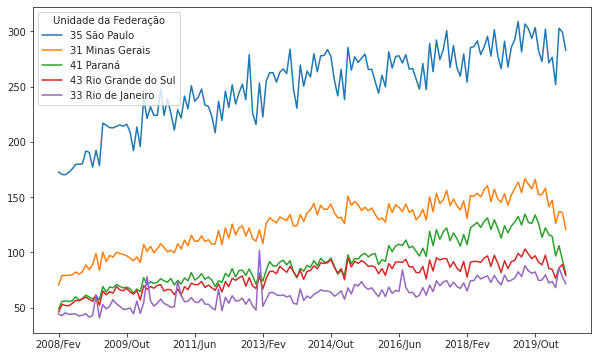

In [ ]:
# Colocando o eixo y na casa dos milhões (sem os vários zeros)
total_ordered = usable_df.drop('Região', axis=1)/1000000
total_ordered.head().T.plot(figsize=(10,6))

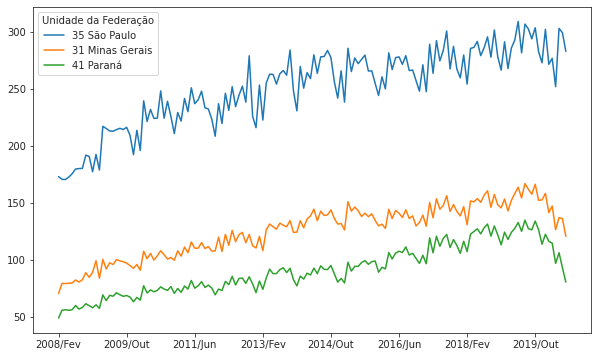

In [ ]:
total_ordered.head(3).T.plot(figsize=(10,6))

In [ ]:
# Filtrando a partir de 2012 (alguns surtos de dengue)
filtered_months = total_ordered.columns[47:]
print(filtered_months[0], filtered_months[-1])

2012/Jan 2020/Jul


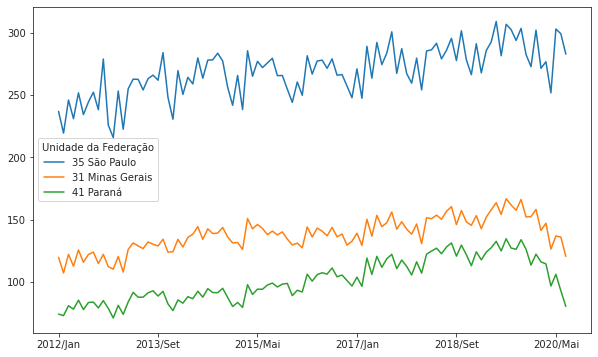

In [ ]:
total_ordered[filtered_months].head(3).T.plot(figsize=(10,6))

Dessa figura, observamos que a escala visual é muito diferente da realidade. Quando olhamos para São Paulo, ele tem aproximadamente 4x mais que Paraná e 2,5x mais que Minas Gerais, em "2018/Set". Porém, olhando para o eixo y, ele é aproximadamente 2,4x e 2x maior, respectivamente.

(0.0, 350.0)

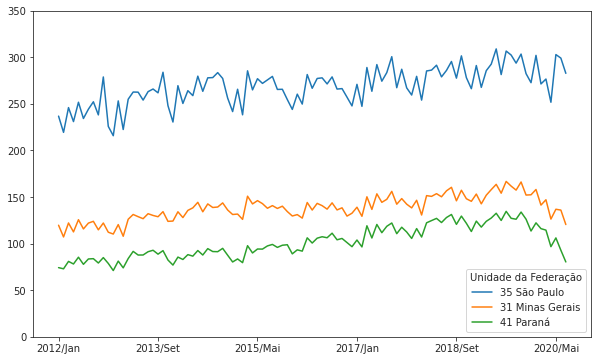

In [ ]:
# Mensagem mais adequada a se passar
total_ordered[filtered_months].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

Esse gráfico é o mais adequado, pois as mensagens visuais e reais condizem entre si de forma aproximada, dado uma determinada data.

(100.0, 350.0)

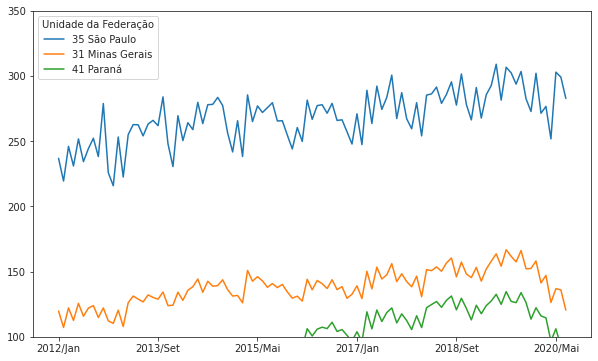

In [ ]:
total_ordered[filtered_months].head(3).T.plot(figsize=(10,6))
plt.ylim(100, 350)

Novamente, aqui observamos certas distorções visuais, como SP tendo 6x mais que Paraná e 3,5x mais que Minas Gerais.

(0.0, 350.0)

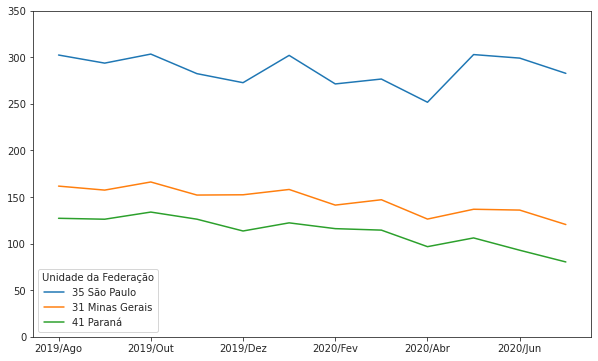

In [ ]:
total_ordered[total_ordered.columns[-12:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

Aparentemente, existe uma queda nesses 3 Estados, dado os útimos meses relatados no SUS...

(0.0, 350.0)

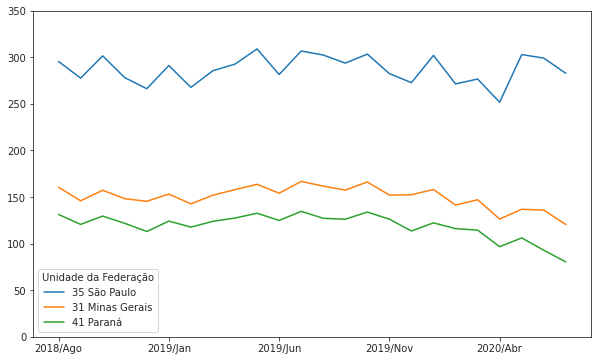

In [ ]:
total_ordered[total_ordered.columns[-24:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

Okay, talvez não era uma queda, e sim uma constância nos valores, nem caindo e nem subindo tanto... porém em Minas Gerais e Paraná, vemos uma leve caída nos valores dos últimos meses.

(0.0, 350.0)

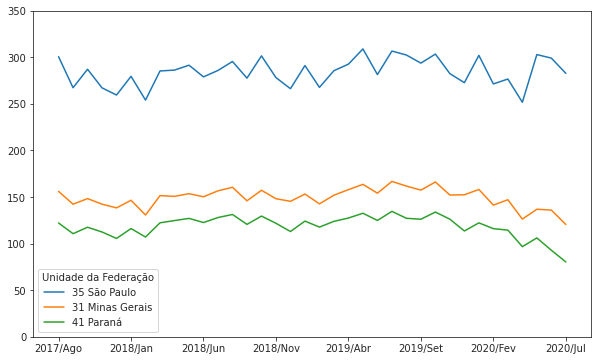

In [ ]:
total_ordered[total_ordered.columns[-36:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

Realmente era isso mesmo...

(0.0, 350.0)

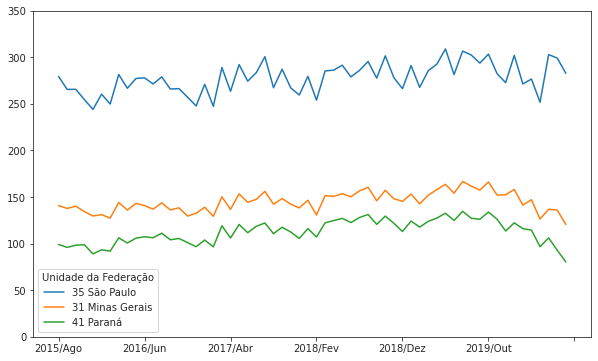

In [ ]:
total_ordered[total_ordered.columns[-60:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

NÃO PERA, acho que os valores estão subindo, e no caso dos últimos 2 na legenda, caem tudo o que subiram... 

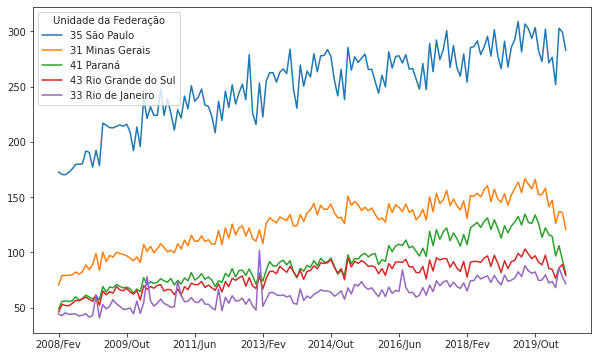

In [ ]:
total_ordered.head().T.plot(figsize=(10,6))

Beleza, os valores subiram um pouco nos últimos tempos, de todos esses 5 Estados...

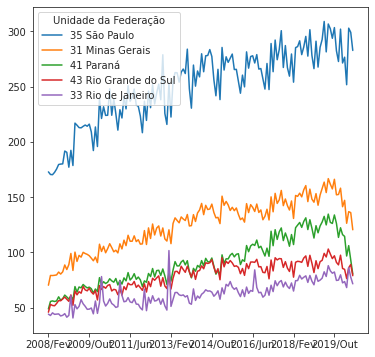

In [ ]:
total_ordered.head().T.plot(figsize=(6,6))

Quer dizer, na verdade eles subiram MUITO...

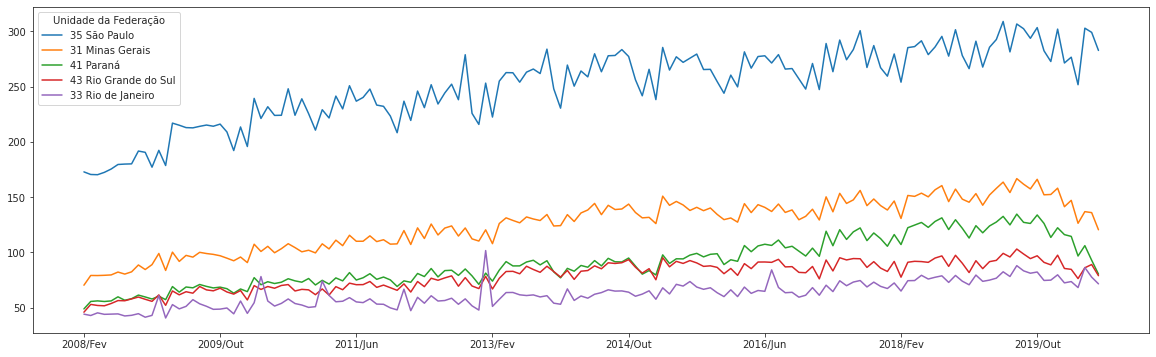

In [ ]:
total_ordered.head().T.plot(figsize=(20,6))

É... Sei lá, desisto.

### Conclusão:
Dessa exposição de gráficos acima, é possível concluir que existem várias formas para manipular a informação, tal como a alteração da escala nos eixos, o corte de seus intervalos e a mudança na dimensão da imagem. Todas elas distorcem a realidade de forma visual e assim, induzindo as pessoas ao erro.

É por isso que, devemos nos atentar firmemente aos detalhes, analisando as escalas e todos os parâmetros que nos são fornecidos, pois a Estatística pode ser usada sim, para mentir. 

E claro, como bons cientistas de dados, devemos nos apegar a ética, tomando o máximo de cuidado para não passarmos informações que, aparentemente, podem estar equivocadas.

## 05. Manipulação e interpretação de gráficos

In [ ]:
most_recent_month = total_ordered.columns[-1]
total_ordered[most_recent_month].head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

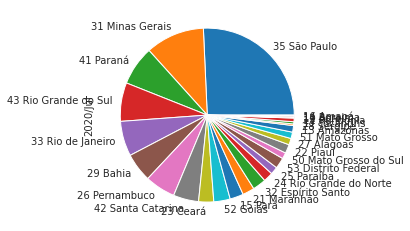

In [ ]:
most_recent_spent = total_ordered[most_recent_month]
most_recent_spent.plot(kind='pie')

Horrores da pizza atual:
- Legenda está horrível;
- Número de fatias inacreditável;
- Cores repetidas.

Já estamos com uma vantagem:
- O gráfico veio ordenado.

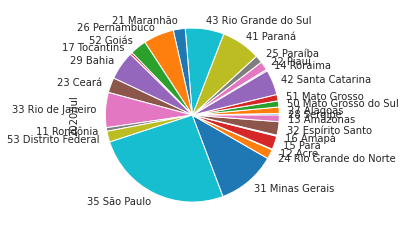

In [ ]:
most_recent_spent.sample(frac=1).plot(kind='pie')

Horrores da pizza atual:
- Legenda está horrível;
- Número de fatias inacreditável;
- Não dá para saber e definir a ordem;
- Cores repetidas;
- Péssimo para comparar.



In [ ]:
display(most_recent_spent)

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

In [ ]:
(most_recent_spent / most_recent_spent.loc['33 Rio de Janeiro']).head()

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/Jul, dtype: float64

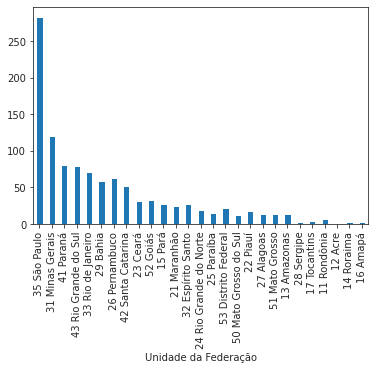

In [ ]:
most_recent_spent.plot(kind='bar')

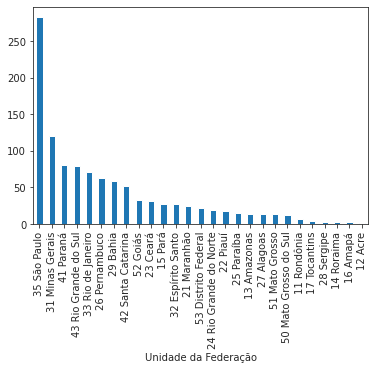

In [ ]:
most_recent_spent = most_recent_spent.sort_values(ascending=False)
most_recent_spent.plot(kind='bar')

### Desafio 1: documentação do Matplotlib e Pandas para colocar *grid* no gráfico.

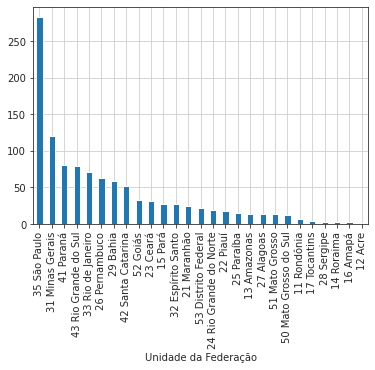

In [ ]:
most_recent_spent.plot(kind='bar')
plt.grid()

Disparadamente, São Paulo teve o maior gasto em Julho de 2020, passando os 250 milhões de reais!

### Desafio 2: gráfico de barras do gasto dos outros Estados em função do seu Estado.

In [ ]:
comparation_sp = most_recent_spent / most_recent_spent.loc['35 São Paulo']
comparation_sp.head()

Unidade da Federação
35 São Paulo           1.00
31 Minas Gerais        0.43
41 Paraná              0.28
43 Rio Grande do Sul   0.28
33 Rio de Janeiro      0.25
Name: 2020/Jul, dtype: float64

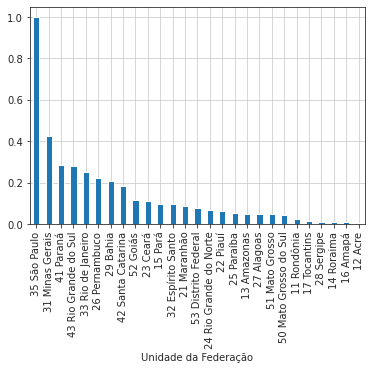

In [ ]:
comparation_sp.plot(kind='bar')
plt.grid()

Agora, temos a comparação dos outros Estados em relação ao que eu moro (São Paulo). Notamos que:
- O segundo maior gasto tem apenas aproximadamente 40% do primeiro, sendo uma diferença muito alta entre as duas barras;
- Somente 1 Estado passa dos 40% do valor gasto em SP, além de que apenas 6 das 26 UF's (tirando SP) conseguem um valor maior ou igual a 20% desse valor.

### Desafio 3: fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Antes de tudo, vamos retirar os números na frente das labels dos Estados, para melhorar a visualização e fazer um *merge* com uma tabela do [IBGE](https://www.ibge.gov.br/cidades-e-estados.html?view=municipio), contendo dados populacionais das UF's de 2020.

In [ ]:
ufs = most_recent_spent.index
print(ufs)

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '26 Pernambuco', '29 Bahia', '42 Santa Catarina',
       '52 Goiás', '23 Ceará', '15 Pará', '32 Espírito Santo', '21 Maranhão',
       '53 Distrito Federal', '24 Rio Grande do Norte', '22 Piauí',
       '25 Paraíba', '13 Amazonas', '27 Alagoas', '51 Mato Grosso',
       '50 Mato Grosso do Sul', '11 Rondônia', '17 Tocantins', '28 Sergipe',
       '14 Roraima', '16 Amapá', '12 Acre'],
      dtype='object', name='Unidade da Federação')


In [ ]:
# Retirando as 3 primeiras letras, ou seja, o número + espaço, de todas
# as labels dos Estados
ufs_without_numbers = []
for uf in ufs:
  uf_without_number = uf[3:]
  ufs_without_numbers.append(uf_without_number)

print(ufs_without_numbers)

['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Pernambuco', 'Bahia', 'Santa Catarina', 'Goiás', 'Ceará', 'Pará', 'Espírito Santo', 'Maranhão', 'Distrito Federal', 'Rio Grande do Norte', 'Piauí', 'Paraíba', 'Amazonas', 'Alagoas', 'Mato Grosso', 'Mato Grosso do Sul', 'Rondônia', 'Tocantins', 'Sergipe', 'Roraima', 'Amapá', 'Acre']


In [ ]:
most_recent_spent.index = ufs_without_numbers
most_recent_spent.head()

São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

Agora vou deixar as UF's como uma coluna, facilitando a futura junção das tabelas.

In [ ]:
most_recent_spent = most_recent_spent.reset_index(name='Gastos')
most_recent_spent.rename(columns={'index':'UF'}, inplace=True)
most_recent_spent.head()

UF  Gastos
0          São Paulo  282.71
1       Minas Gerais  120.47
2             Paraná   80.32
3  Rio Grande do Sul   78.93
4     Rio de Janeiro   71.54

In [ ]:
# Lendo a tabela do IBGE
population_df = pd.read_excel('/content/drive/MyDrive/Alura Bootcamp DS/Módulo 1/datasets/735fcbfbcf5f62f966b2b6450027c68c.xlsx',
                              skiprows=2, skipfooter=15)
population_df.head()

UF [-]  ...  Total de veículos - veículos [2018]
0      Acre  ...                               277831
1   Alagoas  ...                               834827
2     Amapá  ...                               195039
3  Amazonas  ...                               883083
4     Bahia  ...                              4139107

[5 rows x 14 columns]

In [ ]:
population_uf = population_df.groupby('UF [-]')['População estimada - pessoas [2020]'].sum()
# Estratégia para transformar em dataframe
population_uf = population_uf.reset_index()
population_uf.rename(columns={'UF [-]':'UF',
                              'População estimada - pessoas [2020]': 'População Absoluta'},
                      inplace=True)
population_uf.head()

UF  População Absoluta
0      Acre              894470
1   Alagoas             3351543
2     Amapá              861773
3  Amazonas             4207714
4     Bahia            14930634

In [ ]:
recent_pop_spent = pd.merge(population_uf, most_recent_spent, on='UF')
recent_pop_spent.head()

UF  População Absoluta  Gastos
0      Acre              894470    1.16
1   Alagoas             3351543   13.09
2     Amapá              861773    2.16
3  Amazonas             4207714   13.36
4     Bahia            14930634   58.90

In [ ]:
recent_pop_spent['Gastos'] = recent_pop_spent['Gastos'] * 1000000
recent_pop_spent['Gastos/Pop'] = recent_pop_spent['Gastos'] / recent_pop_spent['População Absoluta']

In [ ]:
recent_pop_spent = recent_pop_spent.sort_values('Gastos/Pop', 
                                                ascending=False)
display(recent_pop_spent)

UF  População Absoluta       Gastos  Gastos/Pop
6      Distrito Federal             3055149  22233542.26        7.28
23       Santa Catarina             7252502  51764534.76        7.14
13               Paraná            11516840  80320852.69        6.97
19    Rio Grande do Sul            11422973  78929703.81        6.91
7        Espírito Santo             4064052  27460475.47        6.76
16           Pernambuco             9616621  62325444.34        6.48
25            São Paulo            46289333 282709570.31        6.11
12         Minas Gerais            21292666 120467187.34        5.66
18  Rio Grande do Norte             3534165  19593057.45        5.54
17                Piauí             3281480  18019214.49        5.49
8                 Goiás             7113540  33499284.38        4.71
11   Mato Grosso do Sul             2809394  12508717.35        4.45
22              Roraima              631181   2739498.41        4.34
21             Rondônia             1796460   7407388.24        4.12
20       Rio de Janeiro            17366189  71540227.33        4.12
4                 Bahia            14930634  58898100.40        3.94
1               Alagoas             3351543  13087850.40        3.91
14              Paraíba             4039277  15491469.06        3.84
10          Mato Grosso             3526220  13083151.70        3.71
9              Maranhão             7114598  24374205.15        3.43
5                 Ceará             9187103  30809221.22        3.35
15                 Pará             8690745  27618727.51        3.18
3              Amazonas             4207714  13358514.02        3.17
26            Tocantins             1590248   4489665.87        2.82
2                 Amapá              861773   2155083.37        2.50
24              Sergipe             2318822   3312766.32        1.43
0                  Acre              894470   1163813.08        1.30

Atendendo ao desafio, vamos comparar São Paulo, meu Estado, com algum qualquer. O escolhido é o Acre, simplesmente porque quero comparar com o menor valor existente.
- São Paulo teve 6,11 reais por habitante, 4,7 vezes o valor do Acre (1,30);
- Minha UF tem a maior população, porém não é aquele com o maior atendimento hospitalar do SUS;
- A posição de São Paulo nessa tabela é a quinta.

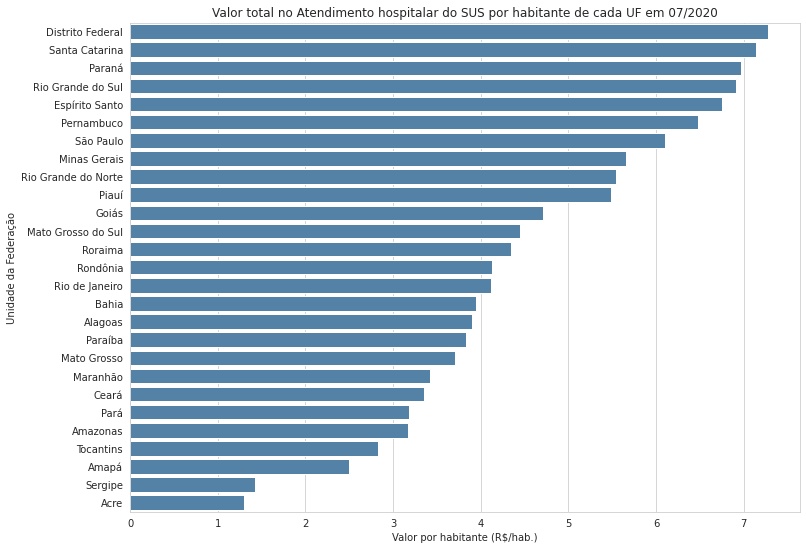

In [ ]:
# Extra
sns.set_style('whitegrid')
plt.figure(figsize=(12, 9))
sns.barplot(x='Gastos/Pop', y='UF', data=recent_pop_spent,
            color='steelblue')
plt.ylabel('Unidade da Federação')
plt.xlabel('Valor por habitante (R$/hab.)')
plt.title('Valor total no Atendimento hospitalar do SUS por habitante de cada UF em 07/2020')
plt.show()

Desse gráfico, podemos notar que:
- Não significa que quanto maior a população do Estado, maior é o gasto por habitante!
- O gasto para esse mês, se formos parar para pensar, é extremamente baixa! O maior valor por habitante, é do Distrito Federal, com apenas um valor próximo de R$ 7,00;
- Não dá para ter certeza, mas um chute meu é que, a distribuição de verba para os Estados está relacionada com a gravidade da COVID-19 em cada UF.

**Observação:** TODAS essas análises são feitas em relação a população estimada de 2020 pelo IBGE, **somente** para o mês de Julho de 2020.

### Desafio 4: faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

### Desafio 5: reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

### Super Desafio: escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

# Módulo 2

## 01. Fontes externas, limpeza e manipulação

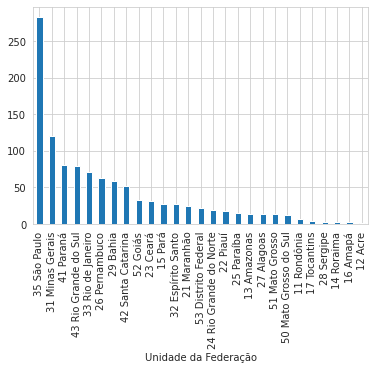

In [ ]:
# Copiando as últimas manipulações feitas no módulo 1
most_recent_month = total_ordered.columns[-1]
most_recent_spent = total_ordered[most_recent_month]
most_recent_spent = most_recent_spent.sort_values(ascending=False)
most_recent_spent.plot(kind='bar')

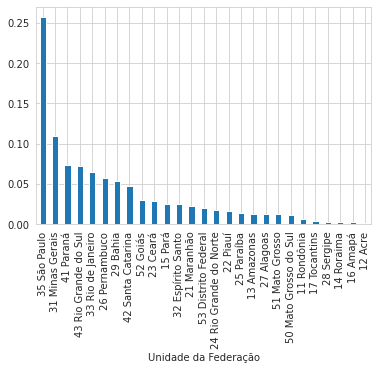

In [ ]:
proporcional_recent_spent = most_recent_spent / most_recent_spent.sum()
proporcional_recent_spent.plot(kind='bar')

In [ ]:
population_str = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [ ]:
population_link = StringIO(population_str)
population_df = pd.read_csv(population_link, sep='\t')
population_df.head()

Posição  ...                         País comparável
0  (habitantes)  ...                                     NaN
1             1  ...  Flag of Spain.svg Espanha (46 439 864)
2             2  ...                  Sri Lanka (20 675 000)
3             3  ...              Países Baixos (16 922 900)
4             4  ...                      Chade (14 037 000)

[5 rows x 5 columns]

In [ ]:
population_df = population_df.dropna()
population_df = population_df.rename(columns = {'Unidade federativa': 'uf', 
                                                'População':'populacao'})
population_df['populacao'] = population_df['populacao'].str.replace(' ', '')
population_df['populacao'] = population_df['populacao'].astype(int)
population_df.head()

Posição  ...                         País comparável
1       1  ...  Flag of Spain.svg Espanha (46 439 864)
2       2  ...                  Sri Lanka (20 675 000)
3       3  ...              Países Baixos (16 922 900)
4       4  ...                      Chade (14 037 000)
5       5  ...                    Bolívia (11 410 651)

[5 rows x 5 columns]

In [ ]:
population_df = population_df.drop(columns = ['Posição', '% da pop. total', 
                                              'País comparável'])
population_df.head()

uf  populacao
1        São Paulo   46289333
2     Minas Gerais   21331292
3   Rio de Janeiro   17366189
4      Bahia Bahia   14930634
5           Paraná   11516840

In [ ]:
# Observação
population_df['uf'].str[:3]

1      Sã
2      Mi
3      Ri
4     Bah
5      Pa
6      Ri
7      Pe
8      Ce
9     Par
10     Sa
11     Go
12     Ma
13     Am
14     Es
15     Pa
16     Ri
17     Ma
18     Al
19     Pi
20     Di
21     Ma
22     Se
23     Ro
24     To
25     Ac
26     Am
27     Ro
Name: uf, dtype: object

In [ ]:
population_df = population_df.set_index('uf')
population_df.head()

populacao
uf                        
 São Paulo        46289333
 Minas Gerais     21331292
 Rio de Janeiro   17366189
Bahia Bahia       14930634
 Paraná           11516840

In [ ]:
population_df.join(most_recent_spent).head()

populacao  2020/Jul
uf                                  
 São Paulo        46289333       nan
 Minas Gerais     21331292       nan
 Rio de Janeiro   17366189       nan
Bahia Bahia       14930634       nan
 Paraná           11516840       nan

In [ ]:
most_recent_spent.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [ ]:
most_recent_spent.index = most_recent_spent.index.str[3:]
most_recent_spent.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [ ]:
population_df.join(most_recent_spent).head()

populacao  2020/Jul
uf                                  
 São Paulo        46289333       nan
 Minas Gerais     21331292       nan
 Rio de Janeiro   17366189       nan
Bahia Bahia       14930634       nan
 Paraná           11516840       nan

In [ ]:
population_df.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Goiás', ' Maranhão', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

In [ ]:
population_df.index = population_df.index.str.strip()
population_df.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
population_df.join(most_recent_spent)

populacao  2020/Jul
uf                                      
São Paulo             46289333    282.71
Minas Gerais          21331292    120.47
Rio de Janeiro        17366189     71.54
Bahia Bahia           14930634       nan
Paraná                11516840     80.32
Rio Grande do Sul     11422973     78.93
Pernambuco             9616621     62.33
Ceará                  9187103     30.81
Pará Pará              8690745       nan
Santa Catarina         7279638     51.76
Goiás                  7142070     33.50
Maranhão               7127460     24.37
Amazonas               4228381     13.36
Espírito Santo         4064052     27.46
Paraíba                4039277     15.49
Rio Grande do Norte    3534165     19.59
Mato Grosso            3526220     13.08
Alagoas                3351543     13.09
Piauí                  3281480     18.02
Distrito Federal       3055149     22.23
Mato Grosso do Sul     2809394     12.51
Sergipe                2318822      3.31
Rondônia               1796460      7.41
Tocantins              1590248      4.49
Acre                    894470      1.16
Amapá                   861773      2.16
Roraima                 631181      2.74

In [ ]:
for state in most_recent_spent.index:
  population_df.index = population_df.index.str.replace(f'{state} {state}',
                                                        state)
print(population_df.index)

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')


In [ ]:
recent_spent_and_population = population_df.join(most_recent_spent)
recent_spent_and_population.head()

populacao  2020/Jul
uf                                 
São Paulo        46289333    282.71
Minas Gerais     21331292    120.47
Rio de Janeiro   17366189     71.54
Bahia            14930634     58.90
Paraná           11516840     80.32

### Desafio 1: Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [ ]:
population_html = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
population_html_df = population_html[0]
population_html_df.head()

Posição Unidade federativa  ... % da pop. total País comparável (habitantes)
0        1          São Paulo  ...           21,9%         Espanha (46 439 864)
1        2       Minas Gerais  ...           10,1%       Sri Lanka (20 675 000)
2        3     Rio de Janeiro  ...            8,2%   Países Baixos (16 922 900)
3        4              Bahia  ...            7,1%           Chade (14 037 000)
4        5             Paraná  ...            5,4%         Bolívia (11 410 651)

[5 rows x 5 columns]

### Desafio 2: Explorar mais métodos de String no Python e str do Pandas

### Desafio 3: Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida"

In [ ]:
def clean_population_and_spent_dfs_then_merge_them(population_df, spent_df):
  population_df = population_df.dropna()
  population_df = population_df.rename(columns={'Unidade federativa':'uf',
                                                'População':'populacao'})
  population_df['populacao'] = population_df['populacao'].str.replace(' ', '')
  population_df['populacao'] = population_df['populacao'].astype(int)
  population_df = population_df.drop(columns=['Posição', '% da pop. total', 
                                              'País comparável'])
  population_df = population_df.set_index('uf')
  population_df.index = population_df.index.str.strip()

  spent_df.index = spent_df.index.str[3:]
  for state in spent_df.index:
    population_df.index = population_df.index.str.replace(f'{state} {state}', state)
  print(population_df.index)
    
  population_and_spent_df = population_df.join(spent_df)
  return population_df, population_and_spent_df

In [ ]:
# Redefinindo os dois dataframes
most_recent_spent = total_ordered[most_recent_month]
most_recent_spent = most_recent_spent.sort_values(ascending=False)

population_link = StringIO(population_str)
population_df = pd.read_csv(population_link, sep='\t')

In [ ]:
pop_df, recent_df = clean_population_and_spent_dfs_then_merge_them(population_df, most_recent_spent)
display(pop_df.head(), recent_df.head())

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')


populacao
uf                       
São Paulo        46289333
Minas Gerais     21331292
Rio de Janeiro   17366189
Bahia            14930634
Paraná           11516840

populacao  2020/Jul
uf                                 
São Paulo        46289333    282.71
Minas Gerais     21331292    120.47
Rio de Janeiro   17366189     71.54
Bahia            14930634     58.90
Paraná           11516840     80.32

## 02. Proporcionalidades e Seaborn

In [ ]:
recent_spent_and_population['2020/Jul'] = recent_spent_and_population['2020/Jul'] * 1000000
recent_spent_and_population['gasto_por_habitante'] = recent_spent_and_population['2020/Jul'] / recent_spent_and_population['populacao']
recent_spent_and_population = recent_spent_and_population.rename(columns={'2020/Jul':'gastos'})
recent_spent_and_population.head()

populacao       gastos  gasto_por_habitante
uf                                                         
São Paulo        46289333 282709570.31                 6.11
Minas Gerais     21331292 120467187.34                 5.65
Rio de Janeiro   17366189  71540227.33                 4.12
Bahia            14930634  58898100.40                 3.94
Paraná           11516840  80320852.69                 6.97

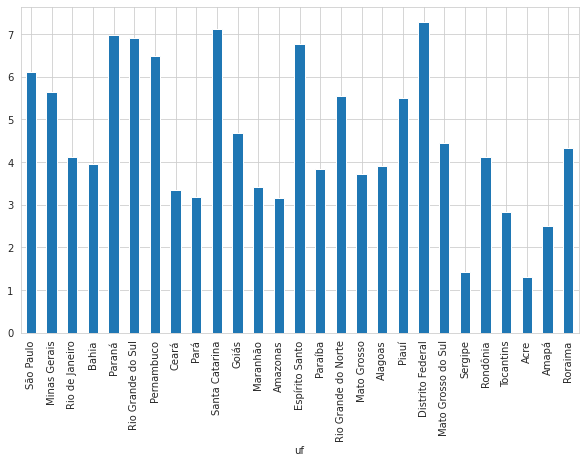

In [ ]:
recent_spent_and_population['gasto_por_habitante'].plot(kind='bar',
                                                        figsize=(10, 6))

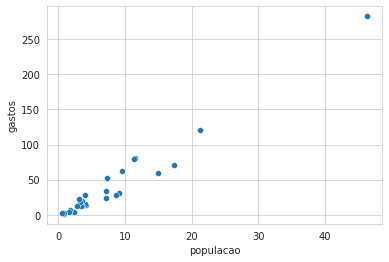

In [ ]:
sns.scatterplot(x='populacao', y='gastos', 
                data=recent_spent_and_population / 1000000)

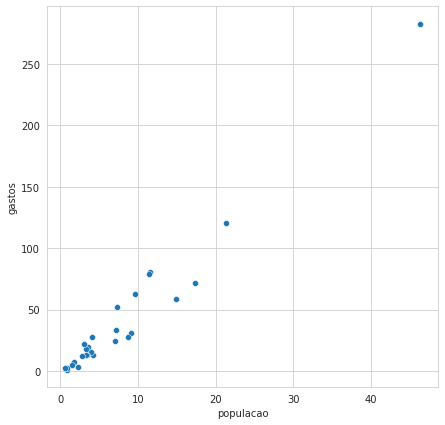

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='populacao', y='gastos', 
                data=recent_spent_and_population / 1000000)

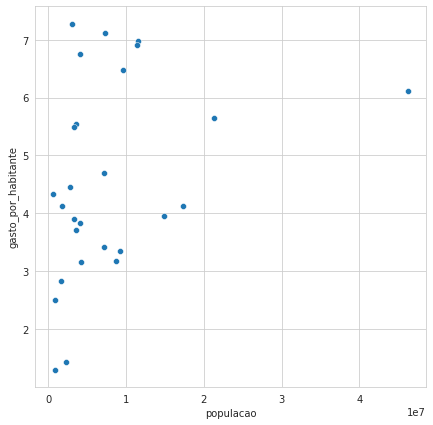

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='populacao', y='gasto_por_habitante', 
                data=recent_spent_and_population)

### Desafio 1: Ordenar por gasto por habitante e ordenar por habitantes. 

Ao invés de ordenar por habitante (já feito em aula), farei ordenado por gasto no último mês (Julho de 2020).

In [ ]:
spent_hab = recent_spent_and_population.sort_values('gasto_por_habitante', 
                                                    ascending=False)
hab = recent_spent_and_population.sort_values('gastos', ascending=False)

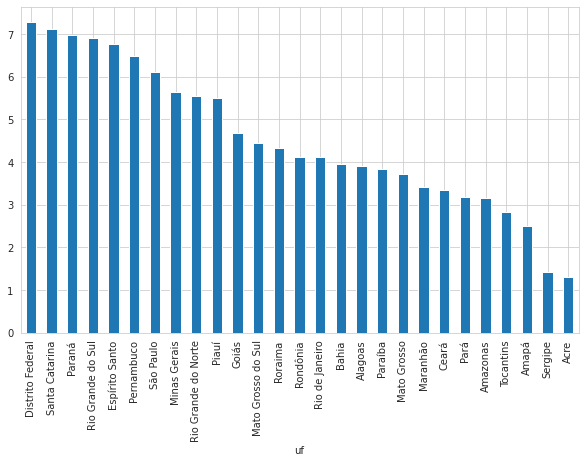

In [ ]:
spent_hab['gasto_por_habitante'].plot(kind='bar', figsize=(10, 6))

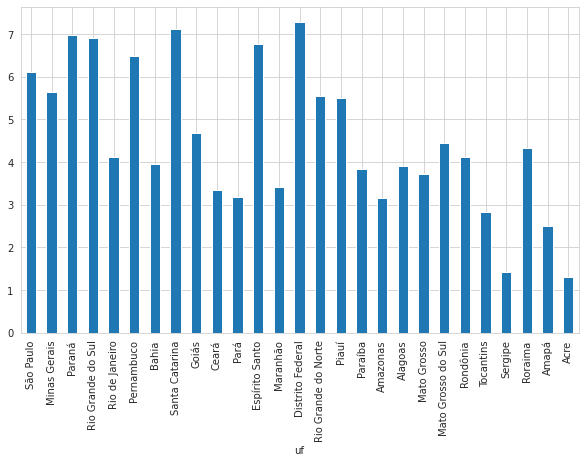

In [ ]:
# 
hab['gasto_por_habitante'].plot(kind='bar', figsize=(10, 6))

### Desafio 2: Plotar no mesmos gráficos do final da aula o mês anterior e o mês correto, analisar e compartilhar suas hipóteses.

Para esse caso, utilizei a função criada em desafios anteriores :). 

In [ ]:
# Baseando na seção 01 do módulo 2
second_most_recent_month = total_ordered.columns[-2]
second_most_recent_spent = total_ordered[second_most_recent_month]
second_most_recent_spent = second_most_recent_spent.sort_values(ascending=False)
second_most_recent_spent.head()

Unidade da Federação
35 São Paulo           299.06
31 Minas Gerais        135.98
41 Paraná               92.90
43 Rio Grande do Sul    89.02
33 Rio de Janeiro       77.60
Name: 2020/Jun, dtype: float64

In [ ]:
# Redefinindo a df população, para utilizarmos a função já preparada 
# do desafio 2 da seção 01 do módulo 2
population_link = StringIO(population_str)
population_df = pd.read_csv(population_link, sep='\t')
population_df.head()

Posição  ...                         País comparável
0  (habitantes)  ...                                     NaN
1             1  ...  Flag of Spain.svg Espanha (46 439 864)
2             2  ...                  Sri Lanka (20 675 000)
3             3  ...              Países Baixos (16 922 900)
4             4  ...                      Chade (14 037 000)

[5 rows x 5 columns]

In [ ]:
pop_df, penultimate_spent_and_pop = clean_population_and_spent_dfs_then_merge_them(population_df, 
                                                                                   second_most_recent_spent)

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')


In [ ]:
penultimate_spent_and_pop.head()

populacao  2020/Jun
uf                                 
São Paulo        46289333    299.06
Minas Gerais     21331292    135.98
Rio de Janeiro   17366189     77.60
Bahia            14930634     65.16
Paraná           11516840     92.90

In [ ]:
penultimate_spent_and_pop = penultimate_spent_and_pop.rename(columns={'2020/Jun':'gastos'})
penultimate_spent_and_pop['gastos'] = penultimate_spent_and_pop['gastos'] * 1000000
penultimate_spent_and_pop['gasto_por_habitante'] = penultimate_spent_and_pop['gastos'] / penultimate_spent_and_pop['populacao']
penultimate_spent_and_pop.head()

populacao       gastos  gasto_por_habitante
uf                                                         
São Paulo        46289333 299060851.62                 6.46
Minas Gerais     21331292 135977571.87                 6.37
Rio de Janeiro   17366189  77604925.21                 4.47
Bahia            14930634  65159300.63                 4.36
Paraná           11516840  92901461.36                 8.07

Text(0.5, 0, 'População em milhões')

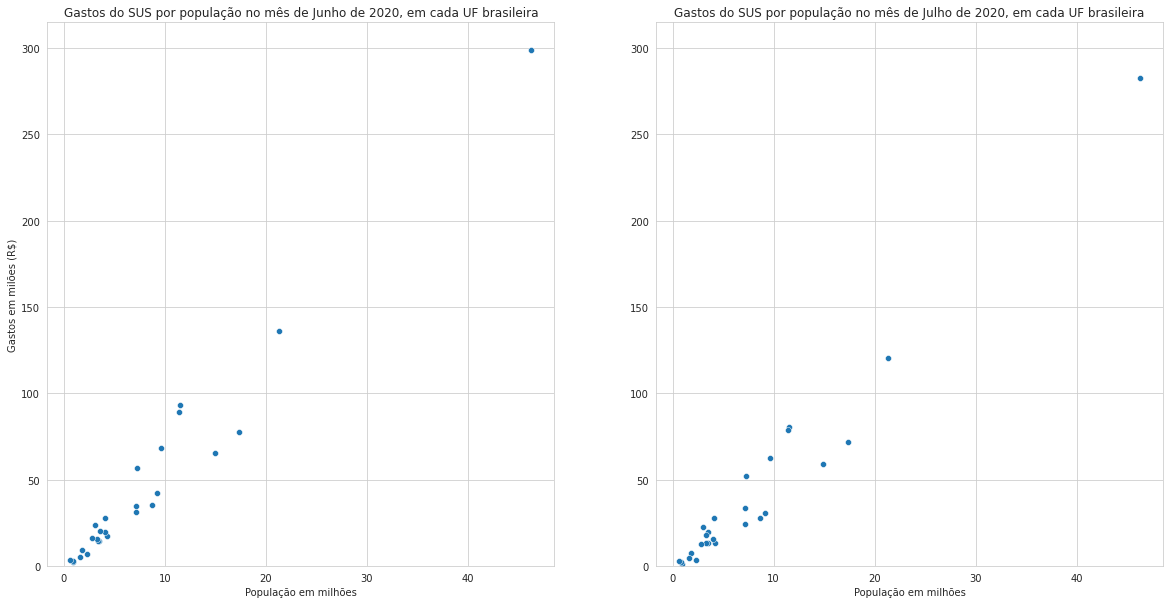

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.scatterplot(x='populacao', y='gastos',
                data=penultimate_spent_and_pop / 1000000)
plt.ylim(0, 315)
plt.title('Gastos do SUS por população no mês de Junho de 2020, em cada UF brasileira')
plt.ylabel('Gastos em milões (R$)')
plt.xlabel('População em milhões')

plt.subplot(122)
sns.scatterplot(x='populacao', y='gastos',
                data=recent_spent_and_population / 1000000)
plt.ylim(0, 315)
plt.title('Gastos do SUS por população no mês de Julho de 2020, em cada UF brasileira')
plt.ylabel('')
plt.xlabel('População em milhões')

Desses dois gráficos, me parece que no mês de Junho houve um gasto maior por população, de algumas UF's. Por exemplo, aquele ponto isolado, está um pouco acima no mês de Junho, quando comparado com o mais atual.

Além disso, a tendência aparentemente é linearmente positiva, ou seja, quanto mais se aumenta a população, mais se gasta para determinada UF.

Text(0.5, 0, 'População em milhões')

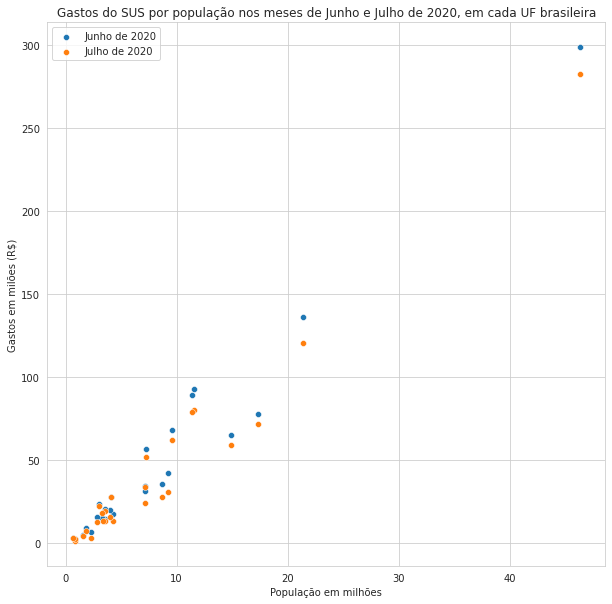

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='populacao', y='gastos', label='Junho de 2020',
                data=penultimate_spent_and_pop / 1000000)
sns.scatterplot(x='populacao', y='gastos', label='Julho de 2020',
                data=recent_spent_and_population / 1000000)
plt.title('Gastos do SUS por população nos meses de Junho e Julho de 2020, em cada UF brasileira')
plt.ylabel('Gastos em milões (R$)')
plt.xlabel('População em milhões')

Este gráfico eu fiz para termos uma melhor visualização dos dois meses.

Text(0.5, 0, 'População')

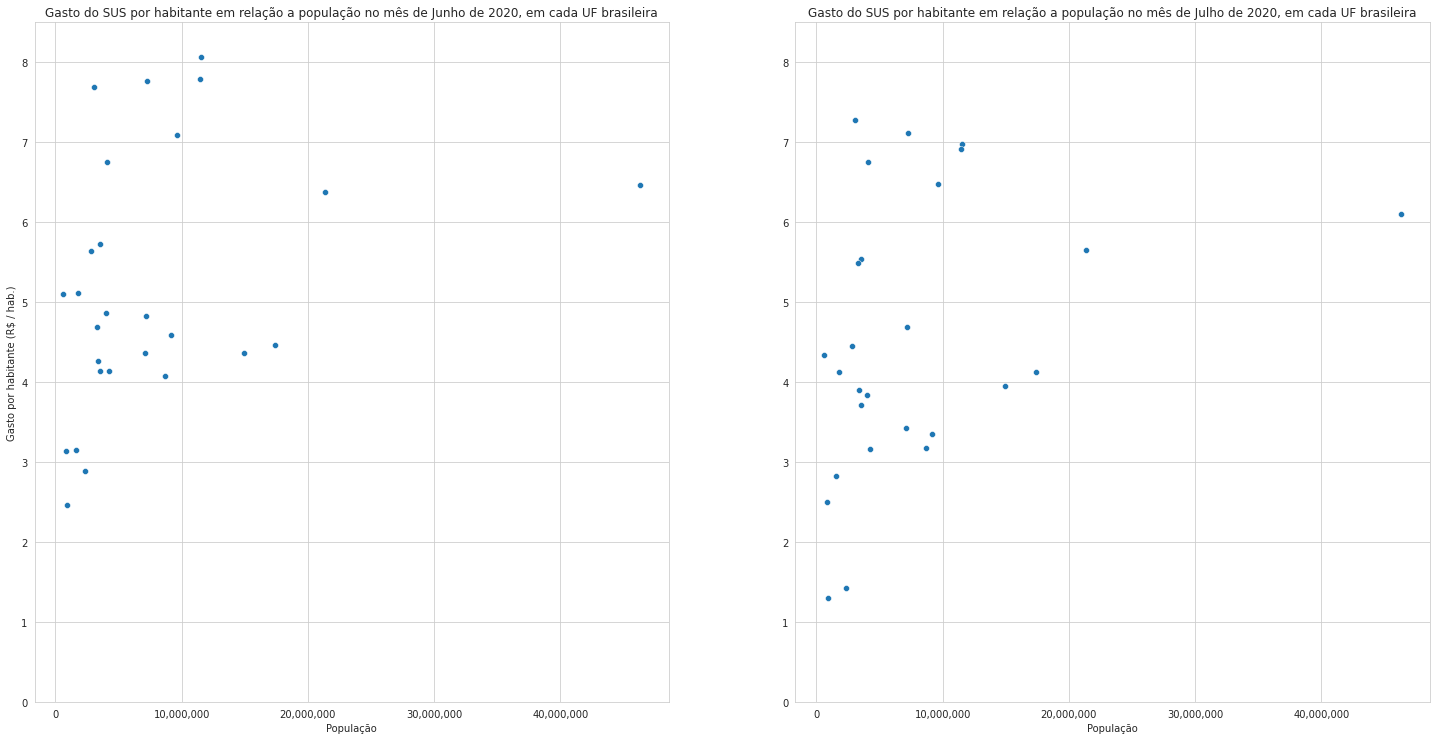

In [ ]:
plt.figure(figsize=(25, 12.5))
plt.subplot(121)
ax = sns.scatterplot(x='populacao', y='gasto_por_habitante',
                data=penultimate_spent_and_pop)
plt.title('Gasto do SUS por habitante em relação a população no mês de Junho de 2020, em cada UF brasileira')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 8.5)
plt.ylabel('Gasto por habitante (R$ / hab.)')
plt.xlabel('População')

plt.subplot(122)
ax = sns.scatterplot(x='populacao', y='gasto_por_habitante',
                data=recent_spent_and_population)
plt.title('Gasto do SUS por habitante em relação a população no mês de Julho de 2020, em cada UF brasileira')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 8.5)
plt.ylabel('')
plt.xlabel('População')

Sinto que no mês de Julho, o gasto por habitante foi um pouco menor que o de Junho, no geral. E infelizmente, aqui não existe nenhum padrão visual, então não consigo concluir nada nesse quesito :(.

Text(0.5, 0, 'População')

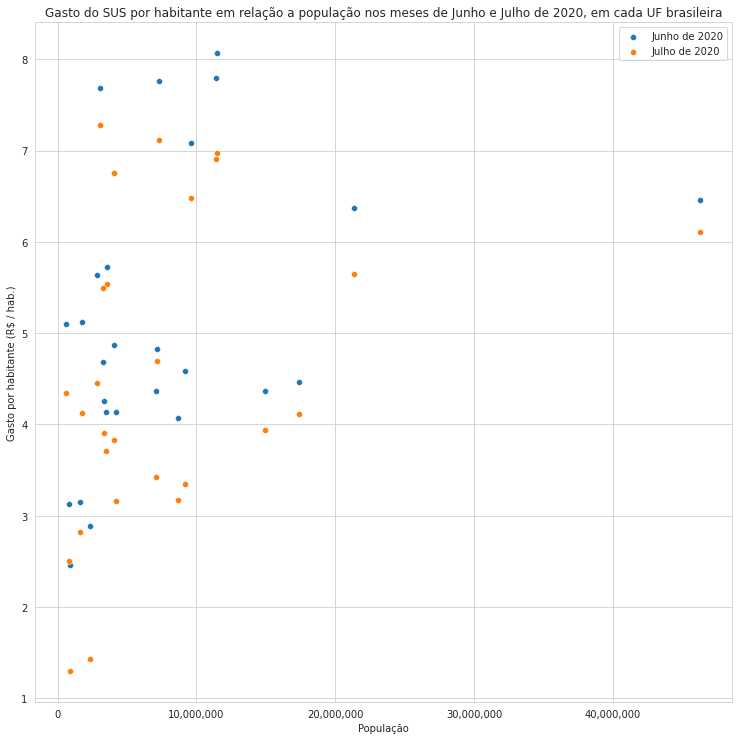

In [ ]:
plt.figure(figsize=(12.5, 12.5))
ax = sns.scatterplot(x='populacao', y='gasto_por_habitante', label='Junho de 2020',
                data=penultimate_spent_and_pop)
ax = sns.scatterplot(x='populacao', y='gasto_por_habitante', label='Julho de 2020',
                data=recent_spent_and_population)
plt.title('Gasto do SUS por habitante em relação a população nos meses de Junho e Julho de 2020, em cada UF brasileira')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Gasto por habitante (R$ / hab.)')
plt.xlabel('População')

Tá aí, foi o que eu senti na conclusão acima haha.

É importante lembrar que, **esses números podem sofrer alterações SIM**, já que os dados são de **gasto por internação**, e não por processamento. Ou seja, nossas conclusões anteriores, tirando o da tendência linear no primeiro gráfico, têm muito pouca significância, já que são dados teoricamente incompletos.

### Desafio 3: Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

Acho que uma forma mais fácil de se fazer esse exercício, não é fazendo uma função, e sim alterando o dataframe utilizado no começo.

Além de que acho melhor alterar o dataframe `total_ordered`, utilizado no início desse notebook, **agora**! Pois se alterarmos no começo, muitos problemas podem acabar aparecendo no meio, pois já fizemos bastante coisa nesse notebook, e eu não lembro direito o que fiz no passado.

Sim, pode parecer preguiça, porque é :).

In [ ]:
total_ordered.index = total_ordered.index.str[3:]
total_ordered = total_ordered * 1000000

In [ ]:
total_ordered_copy = total_ordered.copy()
total_ordered_copy.head()

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
Unidade da Federação                            ...                          
São Paulo            172834914.73 170481849.56  ... 299060851.62 282709570.31
Minas Gerais          70301089.50  79119005.51  ... 135977571.87 120467187.34
Paraná                48855046.46  55611791.07  ...  92901461.36  80320852.69
Rio Grande do Sul     45897704.82  52928695.92  ...  89019478.82  78929703.81
Rio de Janeiro        44122593.19  42892665.52  ...  77604925.21  71540227.33

[5 rows x 150 columns]

In [ ]:
# Esse é o método mais rápido, na minha visão
for month in total_ordered_copy.columns:
  total_ordered_copy = total_ordered_copy.rename(columns={month:f'gastos_{month}'})
  total_ordered_copy[f'gastos_por_habitante_{month}'] = total_ordered_copy[f'gastos_{month}'] / recent_spent_and_population['populacao']

In [ ]:
# pop_df é o dataframe gerado no desafio da aula 1 módulo 2
total_ordered_copy = pop_df.join(total_ordered_copy)
total_ordered_copy.head()

populacao  ...  gastos_por_habitante_2020/Jul
uf                         ...                               
São Paulo        46289333  ...                           6.11
Minas Gerais     21331292  ...                           5.65
Rio de Janeiro   17366189  ...                           4.12
Bahia            14930634  ...                           3.94
Paraná           11516840  ...                           6.97

[5 rows x 301 columns]

Ao invés de plotarmos os mesmos gráficos do desafio anterior, acho bem melhor nós analisarmos datas que os valores podem estar mais consolidados. Portanto, vou analisar os dados de 2018 e 2019, e o mês pode ser de qualquer escolha.

**Observação:** quero ressaltar que, a população considerada é a mesma (2020), então não estou olhando para a população absoluta de cada ano em específico, mas acredito que estas sejam próximas, dado a proximidade com o ano de 2020.

Text(0.5, 0, 'População em milhões')

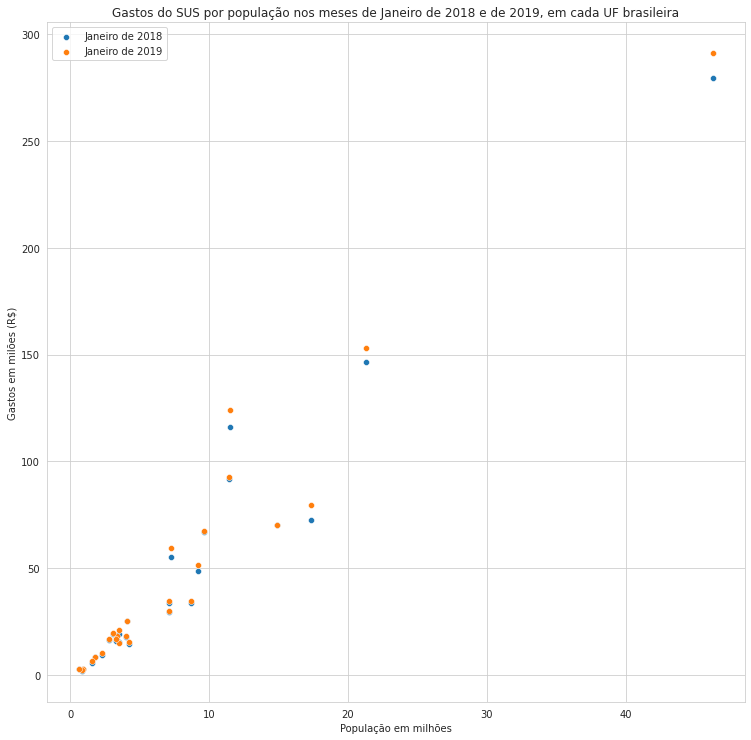

In [ ]:
plt.figure(figsize=(12.5, 12.5))
ax = sns.scatterplot(x='populacao', y='gastos_2018/Jan', 
                data=total_ordered_copy / 1000000, label='Janeiro de 2018')
ax = sns.scatterplot(x='populacao', y='gastos_2019/Jan', 
                data=total_ordered_copy / 1000000, label='Janeiro de 2019')
plt.title('Gastos do SUS por população nos meses de Janeiro de 2018 e de 2019, em cada UF brasileira')
plt.ylabel('Gastos em milões (R$)')
plt.xlabel('População em milhões')

Bom, não mudou tanto de um ano para o outro. Mas podemos observar que, alguns pontos em laranja estão um pouco acima dos azuis, tendo assim, um gasto levemente maior em 2019 em certas UF's.

Nota-se que a tendência linear ainda se mantém!

Text(0.5, 0, 'População')

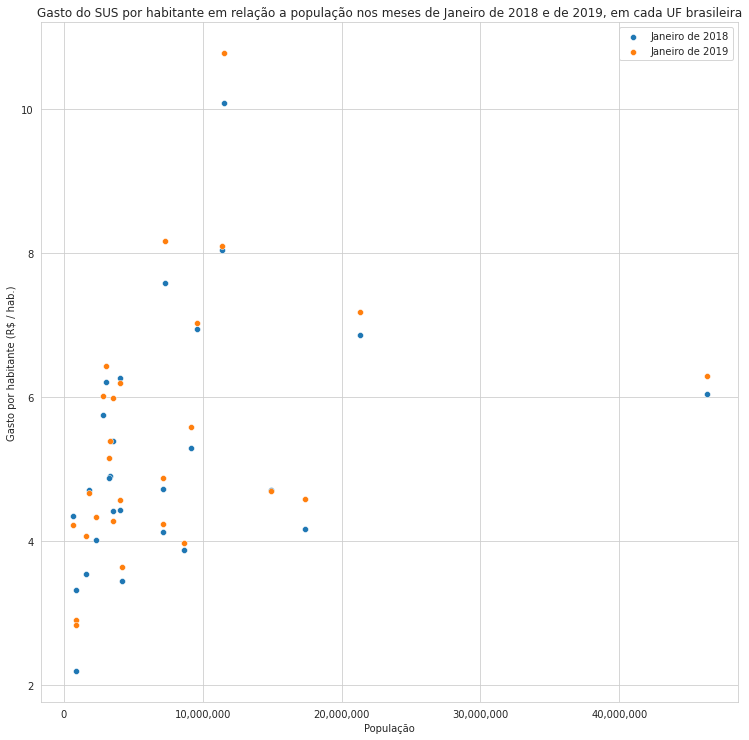

In [ ]:
plt.figure(figsize=(12.5, 12.5))
ax = sns.scatterplot(x='populacao', y='gastos_por_habitante_2018/Jan', label='Janeiro de 2018',
                data=total_ordered_copy)
ax = sns.scatterplot(x='populacao', y='gastos_por_habitante_2019/Jan', label='Janeiro de 2019',
                data=total_ordered_copy)
plt.title('Gasto do SUS por habitante em relação a população nos meses de Janeiro de 2018 e de 2019, em cada UF brasileira')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Gasto por habitante (R$ / hab.)')
plt.xlabel('População')

Aqui, observamos que, grande parte das UF's tiveram um gasto por habitante um pouco maior em 2019, e assim como o gráfico análogo de 2020, não temos nenhuma tendência visual explicita desses pontos.

Enfim, as tendências lineares se mantiveram em todas essas análises. Além disso, podemos perceber que, ao plotarmos os pontos, não houveram alterações tão significantes, apenas um leve aumento nos gastos brutos e gastos por habitante, de 2018 a 2019, lembrando que temos dados mais consolidados por conta de serem mais antigos.

Temos de lembrar que, apesar desses dados serem mais consolidados, **ainda podem sofrer alterações**!

### Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

## 03. Ticks, escalas e formatação de imagens

In [ ]:
total_ordered.head()

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
Unidade da Federação                            ...                          
São Paulo            172834914.73 170481849.56  ... 299060851.62 282709570.31
Minas Gerais          70301089.50  79119005.51  ... 135977571.87 120467187.34
Paraná                48855046.46  55611791.07  ...  92901461.36  80320852.69
Rio Grande do Sul     45897704.82  52928695.92  ...  89019478.82  78929703.81
Rio de Janeiro        44122593.19  42892665.52  ...  77604925.21  71540227.33

[5 rows x 150 columns]

In [ ]:
total_ordered.T.head()

Unidade da Federação    São Paulo  Minas Gerais  ...    Roraima      Amapá
2008/Fev             172834914.73   70301089.50  ...  771687.83 1275063.72
2008/Mar             170481849.56   79119005.51  ...  876091.18 1177745.93
2008/Abr             170278285.95   79046322.41  ...  896952.53 1396371.51
2008/Mai             172402180.59   79268070.12  ... 1027288.73 1411520.77
2008/Jun             175416595.83   79608652.53  ...  938293.54 1420892.01

[5 rows x 27 columns]

In [ ]:
monthly = total_ordered.T
monthly.head()

Unidade da Federação    São Paulo  Minas Gerais  ...    Roraima      Amapá
2008/Fev             172834914.73   70301089.50  ...  771687.83 1275063.72
2008/Mar             170481849.56   79119005.51  ...  876091.18 1177745.93
2008/Abr             170278285.95   79046322.41  ...  896952.53 1396371.51
2008/Mai             172402180.59   79268070.12  ... 1027288.73 1411520.77
2008/Jun             175416595.83   79608652.53  ...  938293.54 1420892.01

[5 rows x 27 columns]

### Desafio 1: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

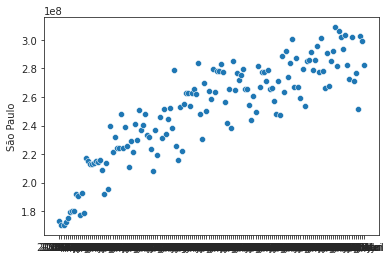

In [ ]:
sns.set_style('ticks')
sns.scatterplot(data=monthly, x=monthly.index, y='São Paulo')

### Desafio 2: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

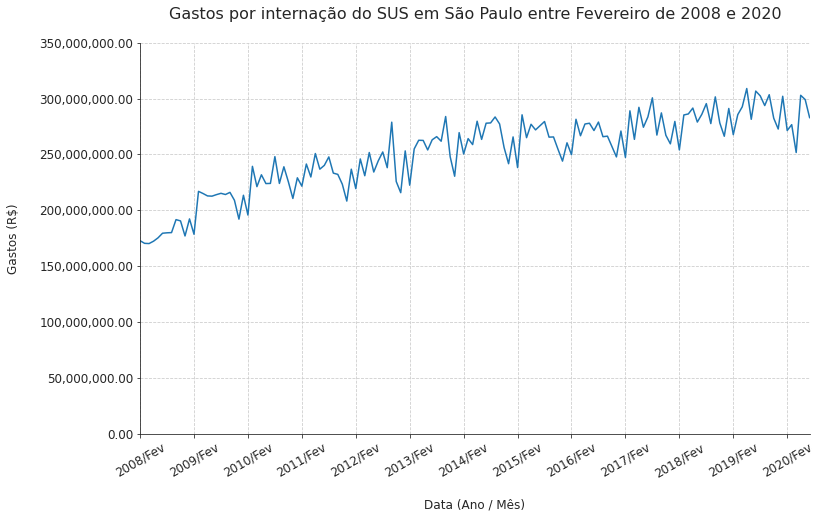

In [ ]:
plt.figure(figsize=(12, 7.2))
ax = sns.lineplot(data=monthly, x=monthly.index, y='São Paulo')
plt.ylim(0, 350000000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.margins(0)
plt.grid(linestyle='--')
plt.xlabel('\nData (Ano / Mês)', fontsize=12)
plt.ylabel('Gastos (R$)\n', fontsize=12)
plt.title('Gastos por internação do SUS em São Paulo entre Fevereiro de 2008 e 2020\n',
          fontsize=16)
sns.despine()
plt.show()

## 04. Trabalhando DateTime e Melt

In [ ]:
monthly.head()

Unidade da Federação    São Paulo  Minas Gerais  ...    Roraima      Amapá
2008/Fev             172834914.73   70301089.50  ...  771687.83 1275063.72
2008/Mar             170481849.56   79119005.51  ...  876091.18 1177745.93
2008/Abr             170278285.95   79046322.41  ...  896952.53 1396371.51
2008/Mai             172402180.59   79268070.12  ... 1027288.73 1411520.77
2008/Jun             175416595.83   79608652.53  ...  938293.54 1420892.01

[5 rows x 27 columns]

In [ ]:
months = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def to_datetime(year_month):
  int_year = int(year_month[:4])
  month = year_month[5:]
  int_month = months[month]
  return date(int_year, int_month, 1)

monthly.index = monthly.index.map(to_datetime)
monthly.head()

Unidade da Federação    São Paulo  Minas Gerais  ...    Roraima      Amapá
2008-02-01           172834914.73   70301089.50  ...  771687.83 1275063.72
2008-03-01           170481849.56   79119005.51  ...  876091.18 1177745.93
2008-04-01           170278285.95   79046322.41  ...  896952.53 1396371.51
2008-05-01           172402180.59   79268070.12  ... 1027288.73 1411520.77
2008-06-01           175416595.83   79608652.53  ...  938293.54 1420892.01

[5 rows x 27 columns]

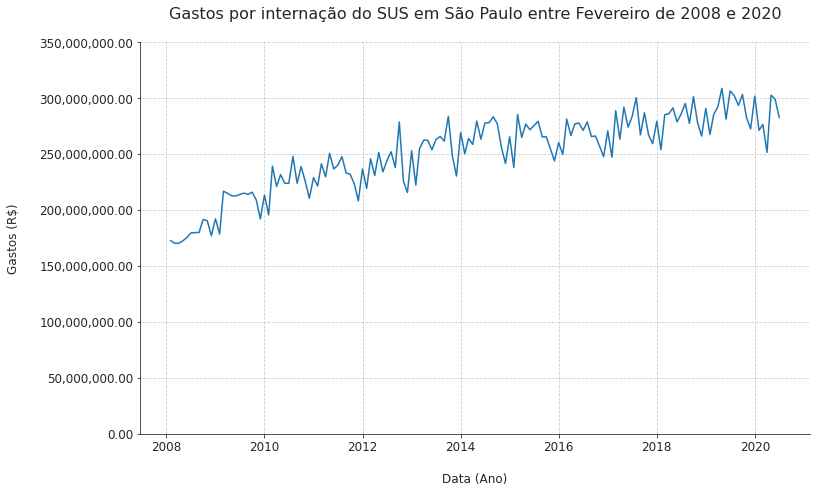

In [ ]:
plt.figure(figsize=(12, 7.2))
ax = sns.lineplot(data=monthly, x=monthly.index, y='São Paulo')
plt.ylim(0, 350000000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.xlabel('\nData (Ano)', fontsize=12)
plt.ylabel('Gastos (R$)\n', fontsize=12)
plt.title('Gastos por internação do SUS em São Paulo entre Fevereiro de 2008 e 2020\n',
          fontsize=16)
sns.despine()
plt.show()

In [ ]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

In [ ]:
monthly.index[0]

datetime.date(2008, 2, 1)

In [ ]:
monthly_melted = monthly.reset_index().melt(id_vars=['index'], value_vars=monthly.columns)
monthly_melted.head()

index Unidade da Federação        value
0  2008-02-01            São Paulo 172834914.73
1  2008-03-01            São Paulo 170481849.56
2  2008-04-01            São Paulo 170278285.95
3  2008-05-01            São Paulo 172402180.59
4  2008-06-01            São Paulo 175416595.83

In [ ]:
monthly_melted.columns = ['dia_mes_ano', 'uf', 'gasto']
monthly_melted['dia_mes_ano'] = monthly_melted['dia_mes_ano'].astype('datetime64')
monthly_melted.head()

dia_mes_ano         uf        gasto
0  2008-02-01  São Paulo 172834914.73
1  2008-03-01  São Paulo 170481849.56
2  2008-04-01  São Paulo 170278285.95
3  2008-05-01  São Paulo 172402180.59
4  2008-06-01  São Paulo 175416595.83

In [ ]:
cmap = plt.get_cmap('nipy_spectral')
colors = [cmap(i) for i in np.linspace(0, 1, len(monthly_melted['uf'].unique()))]

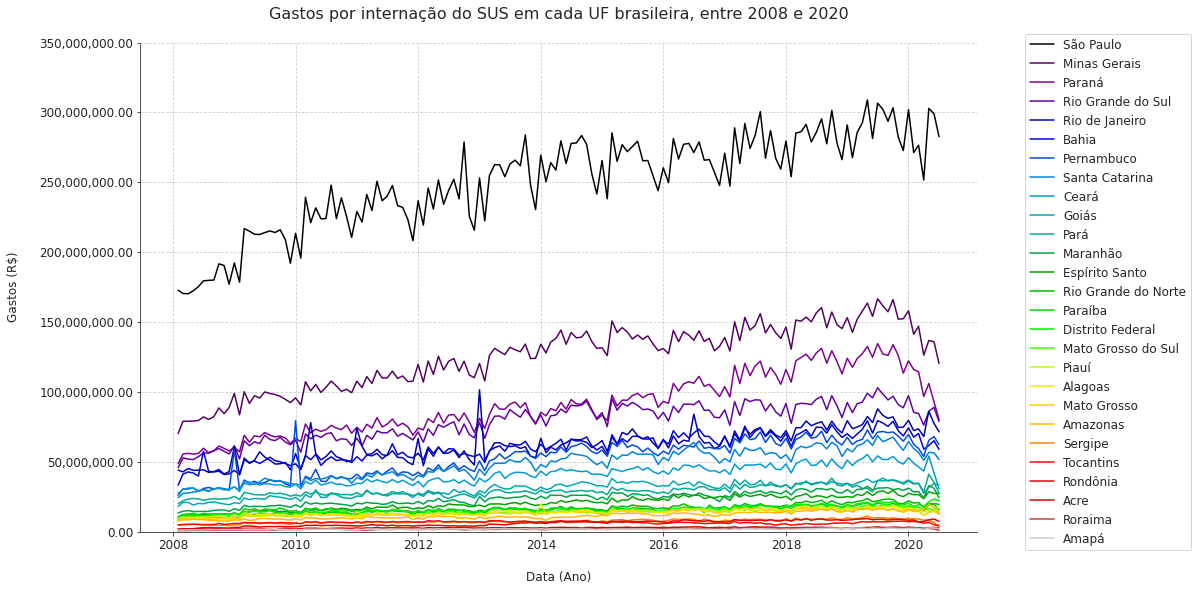

In [ ]:
plt.figure(figsize=(15, 9))
ax = sns.lineplot(data=monthly_melted, x='dia_mes_ano', y='gasto', hue='uf',
                  palette=colors)
plt.ylim(0, 350000000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)
plt.xlabel('\nData (Ano)', fontsize=12)
plt.ylabel('Gastos (R$)\n', fontsize=12)
plt.title('Gastos por internação do SUS em cada UF brasileira, entre 2008 e 2020\n',
          fontsize=16)
sns.despine()
plt.show()

### Desafio 1: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

### Desafio 2: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [ ]:
monthly_unmelted = monthly_melted.pivot_table(index='dia_mes_ano', columns='uf')
monthly_unmelted.head()

gasto              ...                        
uf                Acre     Alagoas  ...    São Paulo  Tocantins
dia_mes_ano                         ...                        
2008-02-01  1743978.66  8112220.30  ... 172834914.73 5051932.07
2008-03-01  2057439.02  9210505.56  ... 170481849.56 5200151.87
2008-04-01  2057829.69 10466691.94  ... 170278285.95 5343714.73
2008-05-01  2226577.93  9844096.03  ... 172402180.59 5344487.99
2008-06-01  2112576.82 10288668.11  ... 175416595.83 5398413.09

[5 rows x 27 columns]

### Desafio 03: Melhorar o gráfico da distribuição do gráfico:

- Escolha apenas alguns estados.
- Mude a palete de cores.
- Posicione a legenda de forma mais adequada.
- Adicione título principal e nos eixos x e y.

Vou reutilizar aquele dataframe usado anteriormente, para descobrir quais UF's são as mais populosas. 

Minha hipótese é que, os gastos vão ser bem parecidos, dado que as populações absolutas são parecidas.

In [ ]:
wanted_data = recent_spent_and_population.sort_values('populacao', ascending=False).head()
display(wanted_data)

populacao       gastos  gasto_por_habitante
uf                                                         
São Paulo        46289333 282709570.31                 6.11
Minas Gerais     21331292 120467187.34                 5.65
Rio de Janeiro   17366189  71540227.33                 4.12
Bahia            14930634  58898100.40                 3.94
Paraná           11516840  80320852.69                 6.97

Bom, acho que São Paulo possui uma população muito maior que o restante, além de que Minas Gerais também possui uma grande diferença de Bahia (aproximadamente 40 milhões). Sendo assim, vou ignorar esses 2 primeiros, tendo uma comparação de: **Rio de Janeiro**, **Bahia** e **Paraná**.

In [ ]:
wanted_states = ['Rio de Janeiro', 'Bahia', 'Paraná']
wanted_df = monthly_melted[monthly_melted['uf'].isin(wanted_states)]
wanted_df.head()

dia_mes_ano      uf       gasto
300  2008-02-01  Paraná 48855046.46
301  2008-03-01  Paraná 55611791.07
302  2008-04-01  Paraná 56115135.82
303  2008-05-01  Paraná 55574831.93
304  2008-06-01  Paraná 56094754.74

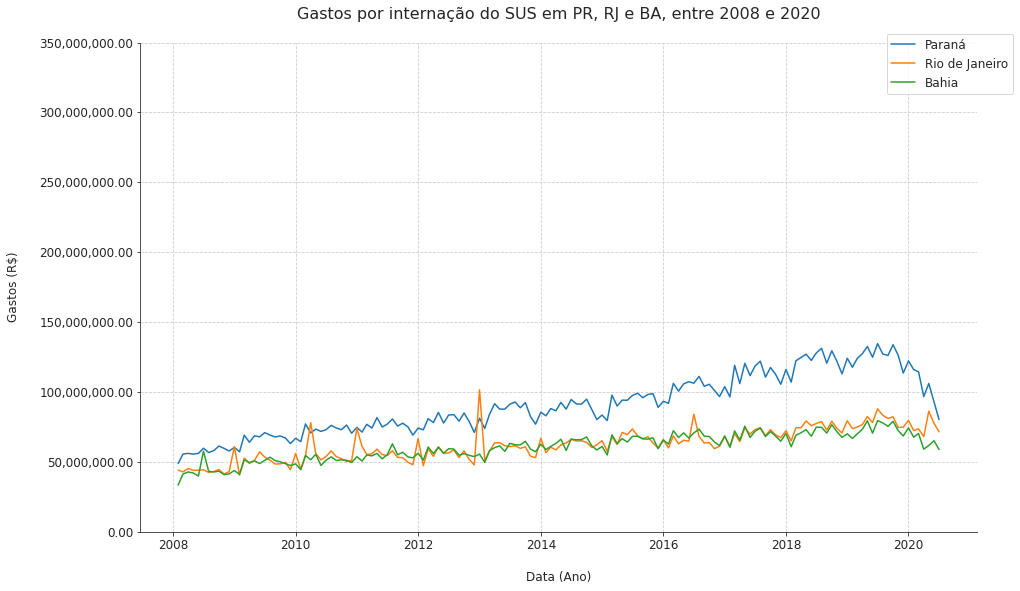

In [ ]:
plt.figure(figsize=(15, 9))
ax = sns.lineplot(data=wanted_df, x='dia_mes_ano', y='gasto', hue='uf')
plt.ylim(0, 350000000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.03), fontsize=12)
plt.xlabel('\nData (Ano)', fontsize=12)
plt.ylabel('Gastos (R$)\n', fontsize=12)
plt.title('Gastos por internação do SUS em PR, RJ e BA, entre 2008 e 2020\n',
          fontsize=16)
sns.despine()
plt.show()

É, minha hipótese foi quase certa, os gastos são bem parecidos uns com os outros. Entretanto, percebemos que a linha de **Paraná** apresenta uma média de gastos um pouco **maior** que os outros dois Estados, estes sendo muito similares entre si.

## 05. Manipulando datas e gerando novas análises

In [ ]:
monthly_melted['mes'] = monthly_melted['dia_mes_ano'].dt.month
monthly_melted['ano'] = monthly_melted['dia_mes_ano'].dt.year
monthly_melted.head()

dia_mes_ano         uf        gasto  mes   ano
0  2008-02-01  São Paulo 172834914.73    2  2008
1  2008-03-01  São Paulo 170481849.56    3  2008
2  2008-04-01  São Paulo 170278285.95    4  2008
3  2008-05-01  São Paulo 172402180.59    5  2008
4  2008-06-01  São Paulo 175416595.83    6  2008

In [ ]:
monthly_melted_sp = monthly_melted.query('uf == "São Paulo"')
monthly_melted_sp.head()

dia_mes_ano         uf        gasto  mes   ano
0  2008-02-01  São Paulo 172834914.73    2  2008
1  2008-03-01  São Paulo 170481849.56    3  2008
2  2008-04-01  São Paulo 170278285.95    4  2008
3  2008-05-01  São Paulo 172402180.59    5  2008
4  2008-06-01  São Paulo 175416595.83    6  2008

In [ ]:
str_month = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio',
             'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro',
             'Novembro', 'Dezembro']
hue_order = list(range(2020, 2007, -2))

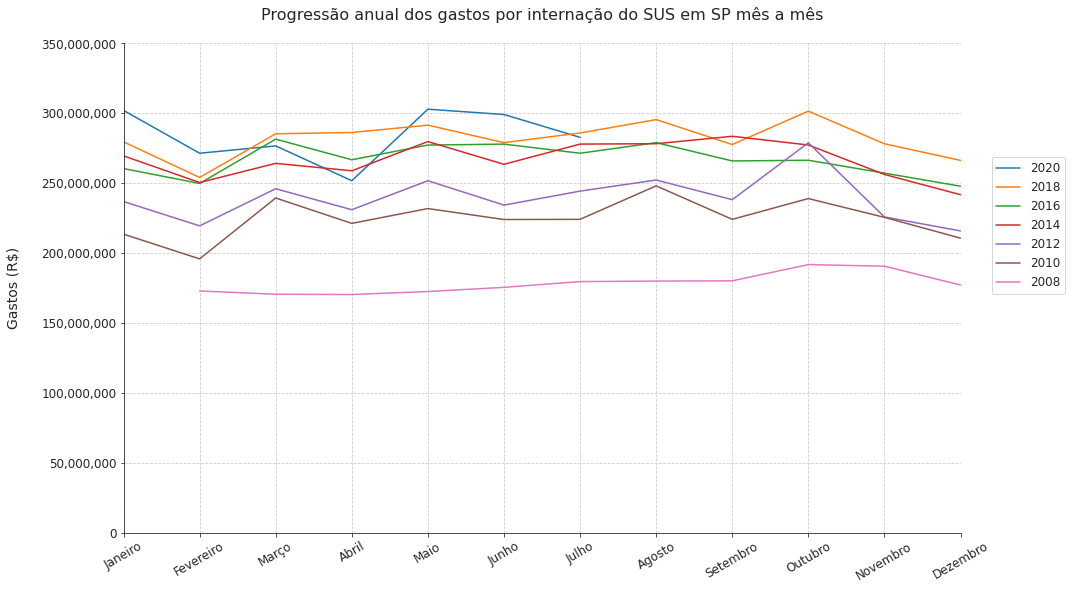

In [ ]:
plt.figure(figsize=(15, 9))
ax = sns.lineplot(x='mes', y='gasto', data=monthly_melted_sp, hue='ano',
                  hue_order=hue_order, palette='tab10')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 350000000)
plt.xticks(ticks=range(1, len(str_month)+1), 
           labels=str_month, rotation=30, fontsize=12)
plt.legend(bbox_to_anchor=(1.03, 0.78), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Gastos (R$)\n', fontsize=14)
plt.title('Progressão anual dos gastos por internação do SUS em SP mês a mês\n',
          fontsize=16)
plt.grid(linestyle='--')
plt.margins(0)
sns.despine()
plt.show()

In [ ]:
days_month = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [ ]:
monthly_melted['gasto_diario'] = monthly_melted['gasto'] / monthly_melted['mes'].map(days_month)
monthly_melted.head()

dia_mes_ano         uf        gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172834914.73    2  2008    6172675.53
1  2008-03-01  São Paulo 170481849.56    3  2008    5499414.50
2  2008-04-01  São Paulo 170278285.95    4  2008    5675942.86
3  2008-05-01  São Paulo 172402180.59    5  2008    5561360.66
4  2008-06-01  São Paulo 175416595.83    6  2008    5847219.86

In [ ]:
monthly_melted_sp['gasto_diario'] = monthly_melted_sp['gasto'] / monthly_melted_sp['mes'].map(days_month)
monthly_melted_sp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dia_mes_ano         uf        gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172834914.73    2  2008    6172675.53
1  2008-03-01  São Paulo 170481849.56    3  2008    5499414.50
2  2008-04-01  São Paulo 170278285.95    4  2008    5675942.86
3  2008-05-01  São Paulo 172402180.59    5  2008    5561360.66
4  2008-06-01  São Paulo 175416595.83    6  2008    5847219.86

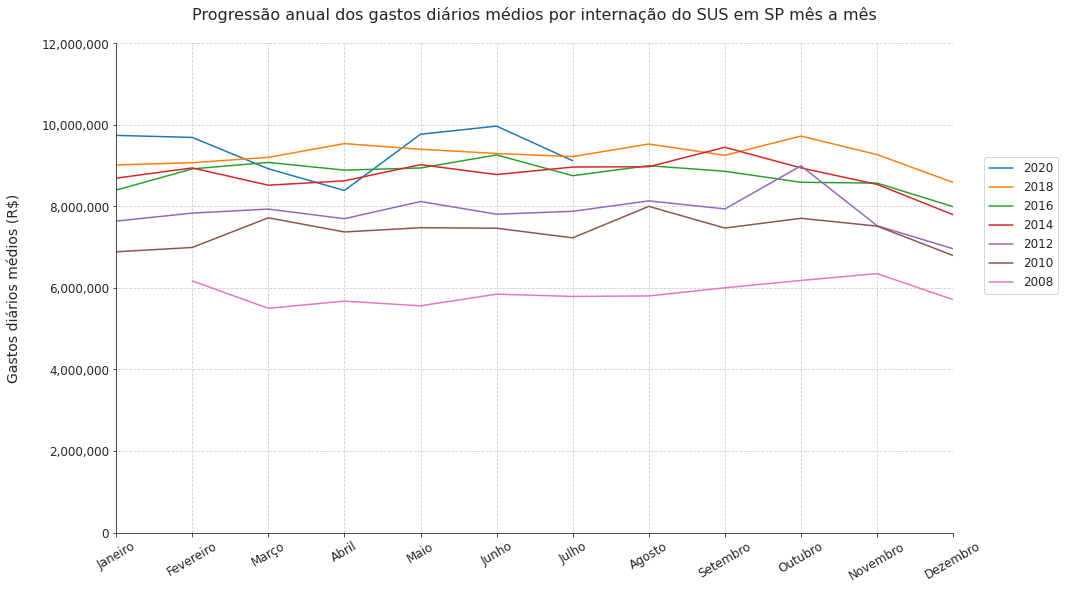

In [ ]:
plt.figure(figsize=(15, 9))
ax = sns.lineplot(x='mes', y='gasto_diario', data=monthly_melted_sp, hue='ano',
                  hue_order=hue_order, palette='tab10')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 12000000)
plt.xticks(ticks=range(1, len(str_month)+1), 
           labels=str_month, rotation=30, fontsize=12)
plt.legend(bbox_to_anchor=(1.03, 0.78), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Gastos diários médios (R$)\n', fontsize=14)
plt.title('Progressão anual dos gastos diários médios por internação do SUS em SP mês a mês\n',
          fontsize=16)
plt.grid(linestyle='--')
plt.margins(0)
sns.despine()
plt.show()

### Desafio 1: Melhorar o gráfico ano a ano: - Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

### Desafio 2: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

Do desafio 3 da seção 04, Módulo 2, obtive que a **Bahia** e o **Paraná** tinham **populações absolutas parecidas**. Aproveitando que, os dois Estados estão sob climas distintos, sendo o primeiro predominantemente Semiárido e o segundo, **Subtropical**, vou usá-los em minha análise.

Fontes:
- https://www.infoescola.com/geografia/clima-da-bahia/
- https://pt.wikipedia.org/wiki/Clima_do_Paran%C3%A1

**Observação:** Considerando a concentração de pessoas, a maior parte de BA vive no litoral (em especial, **Salvador**), sendo assim, o clima que devemos considerar para BA é o **Tropical**.

In [ ]:
monthly_melted_ba = monthly_melted.query('uf == "Bahia"')
monthly_melted_pr = monthly_melted.query('uf == "Paraná"')

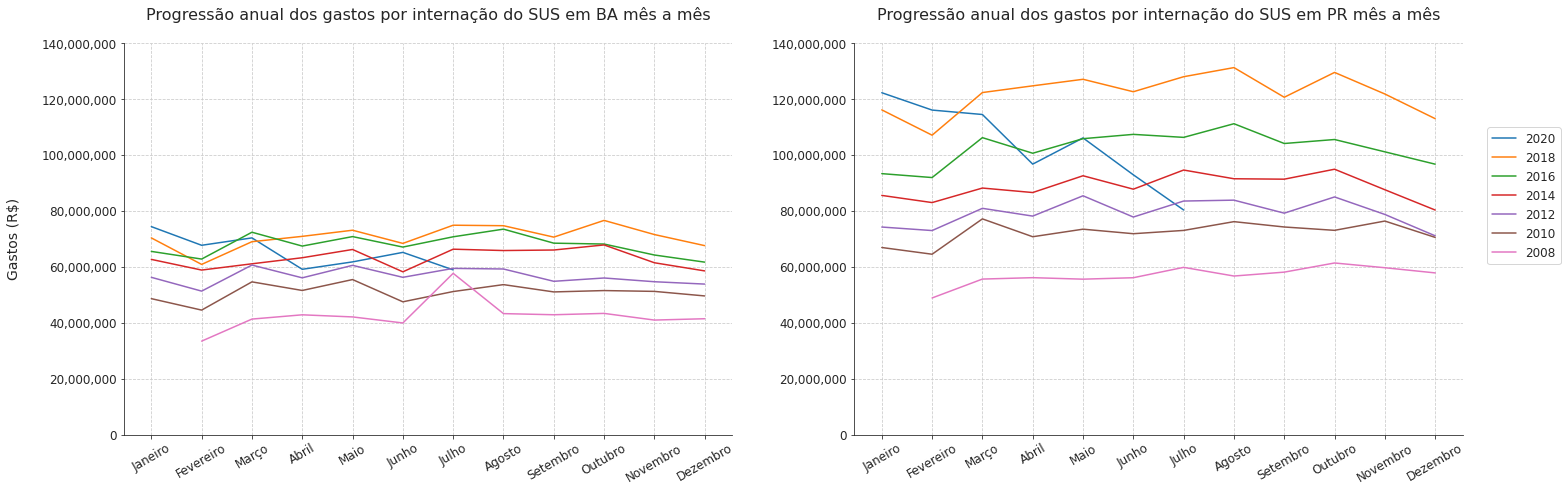

In [ ]:
plt.figure(figsize=(24, 7.2))
plt.subplot(121)
ax = sns.lineplot(x='mes', y='gasto', hue='ano', hue_order=hue_order,
                  data=monthly_melted_ba, palette='tab10', legend=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 140000000)
plt.xticks(ticks=range(1, len(str_month)+1), 
           labels=str_month, rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Gastos (R$)\n', fontsize=14)
plt.title('Progressão anual dos gastos por internação do SUS em BA mês a mês\n',
          fontsize=16)
plt.grid(linestyle='--')
sns.despine()

plt.subplot(122)
ax = sns.lineplot(x='mes', y='gasto', hue='ano', hue_order=hue_order,
                data=monthly_melted_pr, palette='tab10')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 140000000)
plt.xticks(ticks=range(1, len(str_month)+1), 
           labels=str_month, rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Gastos (R$)\n', fontsize=14)
plt.legend(bbox_to_anchor=(1.03, 0.8), fontsize=12)
plt.title('Progressão anual dos gastos por internação do SUS em PR mês a mês\n',
          fontsize=16)
plt.ylabel('')
plt.grid(linestyle='--')
sns.despine()

- Os gastos de PR são mais altos, em comparação com a Bahia;
- Aparentemente, a variação anual dos gastos em Bahia é muito menor comparado com Paraná, ou seja, nós temos linhas mais espremidas umas com as outras em BA, diferentemente de PR;
- O clima pode ser um fator a se considerar, já que como o clima que estamos considerando para Bahia é o Tropical, as doenças virais acabam tendo uma taxa de contágio menor que Paraná, cujo clima é Subtropical (mais seco e frio, consequentemente mais fácil das doenças se proliferarem).

**Observação:** A última abordagem acima é feita, basicamente, na suposição. Não é algo que realmente é confirmado pela comunidade científica! Apenas tentei arranjar alguma explicação para estes gastos distintos entre as UF's.

## 06. Agrupando dados e analisando por categoria

In [ ]:
sp_grouped_year = monthly_melted_sp.groupby('ano').sum()
sp_grouped_year.head()

gasto  mes  gasto_diario
ano                                  
2008 1960230442.26   77   64600828.91
2009 2489030484.83   78   81823449.01
2010 2696622949.86   78   88626495.26
2011 2794549339.77   78   91905424.14
2012 2873973262.98   78   94466122.27

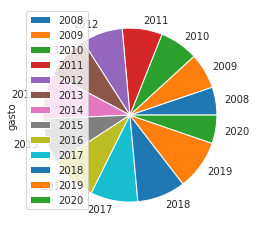

In [ ]:
sp_grouped_year.plot(kind='pie', y='gasto')

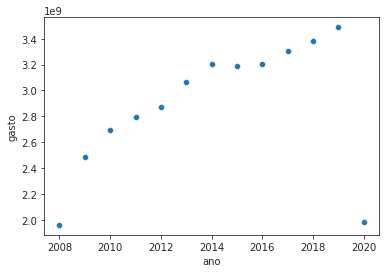

In [ ]:
sns.scatterplot(x=sp_grouped_year.index, y='gasto', data=sp_grouped_year)

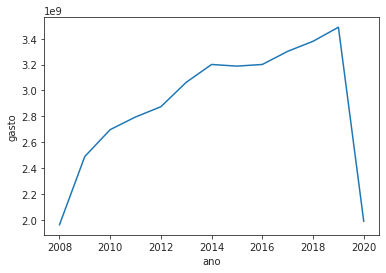

In [ ]:
sns.lineplot(x=sp_grouped_year.index, y='gasto', data=sp_grouped_year)

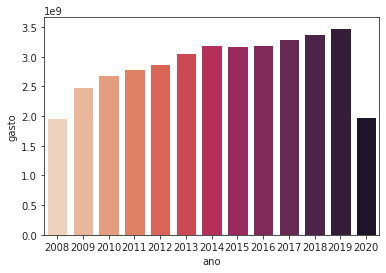

In [ ]:
sns.barplot(x=sp_grouped_year.index, y='gasto', data=sp_grouped_year, palette='rocket_r')

In [ ]:
states = ['São Paulo', 'Minas Gerais', 'Pernambuco']
state_by_year = monthly_melted.query('uf in @states').groupby(['uf', 'ano']).sum().reset_index()
state_by_year.head()

uf   ano         gasto  mes  gasto_diario
0  Minas Gerais  2008  894346731.42   77   29442915.97
1  Minas Gerais  2009 1149141349.15   78   37767441.61
2  Minas Gerais  2010 1217493124.37   78   40025073.84
3  Minas Gerais  2011 1315021864.36   78   43242529.34
4  Minas Gerais  2012 1408354148.98   78   46290727.60

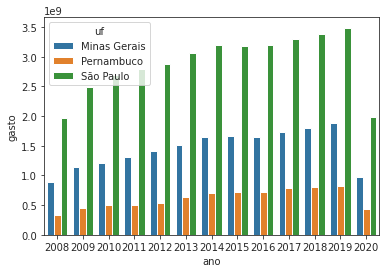

In [ ]:
sns.barplot(x='ano', y='gasto', data=state_by_year, hue='uf')

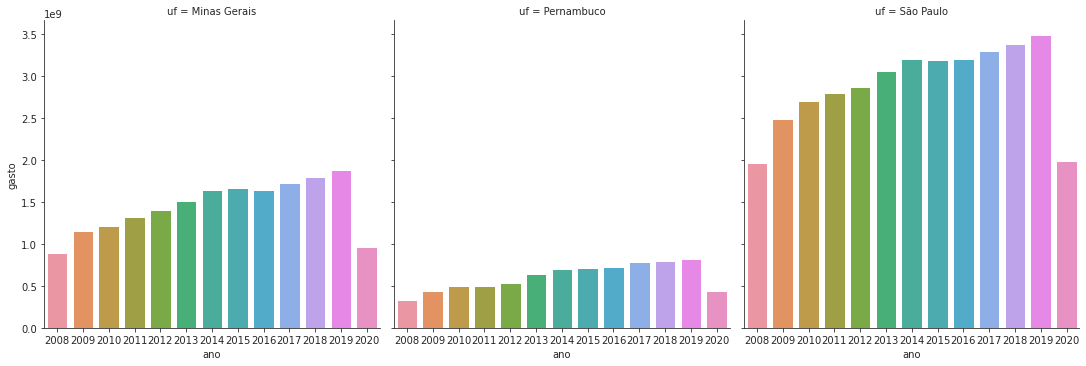

In [ ]:
sns.catplot(x='ano', y='gasto', data=state_by_year, kind='bar', col='uf')

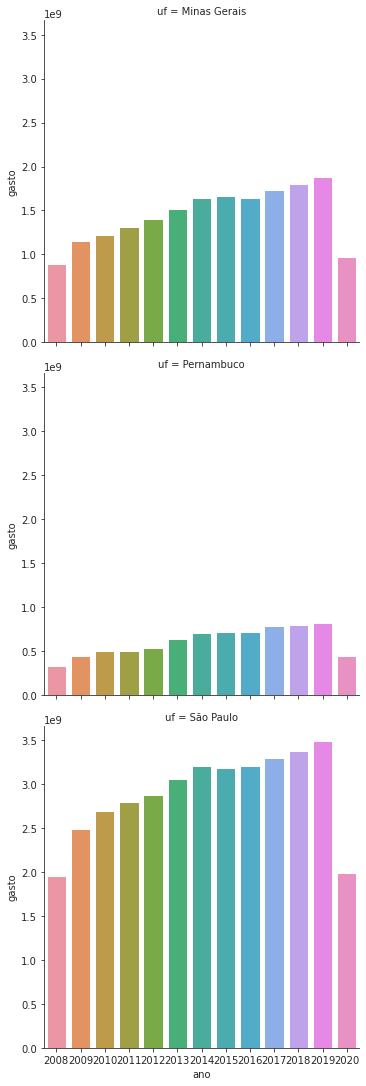

In [ ]:
sns.catplot(x='ano', y='gasto', data=state_by_year, kind='bar', row='uf')

### Desafio 1: Reordenar as cores pelo valor do eixo y.

In [ ]:
hue_order = sp_grouped_year.reset_index().sort_values('gasto', ascending=True)['ano']
hue_order.index = range(len(hue_order))
print(hue_order)

0     2008
1     2020
2     2009
3     2010
4     2011
5     2012
6     2013
7     2015
8     2014
9     2016
10    2017
11    2018
12    2019
Name: ano, dtype: int64


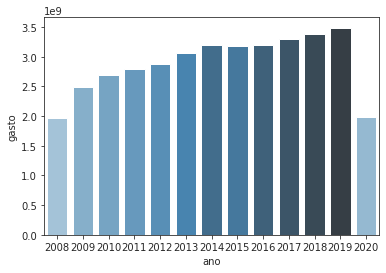

In [ ]:
palette = sns.color_palette('Blues_d', len(hue_order))
palette_hue_ordered = dict(zip(hue_order, palette))
sns.barplot(x=sp_grouped_year.index, y='gasto', data=sp_grouped_year, 
            palette=palette_hue_ordered)

In [ ]:
print(palette)

[(0.97025511, 0.81566605, 0.71120296), (0.96516917, 0.70776351, 0.5606593), (0.96228344, 0.59304598, 0.43145271), (0.95381595, 0.46373781, 0.31769923), (0.93435067, 0.32928362, 0.24775328), (0.8833417, 0.19830556, 0.26014181), (0.79085854, 0.10184672, 0.313391), (0.67824099, 0.09192342, 0.3504148), (0.55734473, 0.11330456, 0.35775059), (0.43860848, 0.12177004, 0.34119475), (0.31826327, 0.1157429, 0.30100076), (0.20973515, 0.09747934, 0.24238489), (0.10692823, 0.06517224, 0.17009175)]


### Desafio 2: Explorar a documentação do Seaborn.

### Desafio 3: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

In [ ]:
state_by_year['gasto_por_1m'] = state_by_year['gasto'] / 1000000
state_by_year.head()

uf   ano         gasto  mes  gasto_diario  gasto_por_1m
0  Minas Gerais  2008  894346731.42   77   29442915.97        894.35
1  Minas Gerais  2009 1149141349.15   78   37767441.61       1149.14
2  Minas Gerais  2010 1217493124.37   78   40025073.84       1217.49
3  Minas Gerais  2011 1315021864.36   78   43242529.34       1315.02
4  Minas Gerais  2012 1408354148.98   78   46290727.60       1408.35

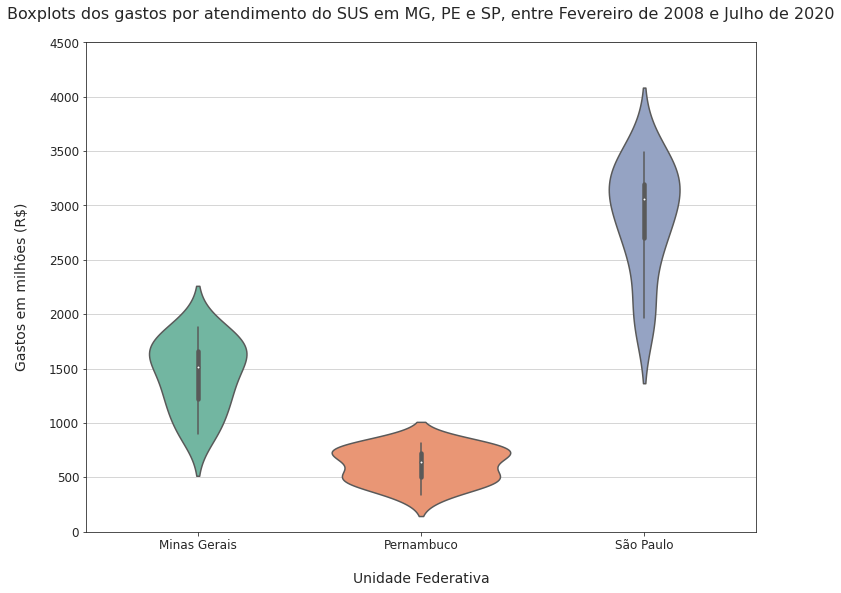

In [ ]:
plt.figure(figsize=(12, 9))
ax = sns.violinplot(x='uf', y='gasto_por_1m', data=state_by_year,
                 palette='Set2')
plt.ylim(0, 4500)
plt.grid(axis='y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nUnidade Federativa', fontsize=14)
plt.ylabel('Gastos em milhões (R$)\n', fontsize=14)
plt.title('Boxplots dos gastos por atendimento do SUS em MG, PE e SP, entre Fevereiro de 2008 e Julho de 2020\n',
          fontsize=16)
plt.show()

O violinplot é legal pois nos dá uma idéia da dispersão dos dados, ou seja, o quanto que, de uma forma geral, os dados estão espalhados uns dos outros, dando também a noção de distribuição. Para quem tiver mais curiosidade, [aqui](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/) vai uma explicação mais detalhada de como ele funciona.

Além disso, o Seaborn disponibiliza, automaticamente, um boxplot interno! Para quem quiser saber mais sobre boxplots, vai [aqui](https://operdata.com.br/blog/como-interpretar-um-boxplot/) um site.

Bom, da figura acima, podemos notar que:

- São Paulo gasta em uma faixa de valores maior, comparado com os outros dois Estados;
- A dispersão dos gastos é muito maior em SP. Isso significa que, SP já gastou valores muito diferentes, ao passar do tempo. Compare com Pernambuco e Minas Gerais, onde os violinos são muito mais achatados, sendo assim, a maioria dos gastos estão muito mais próximos entre si.

### Desafio 4: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.